In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('player_stats_new.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# Display the first few rows of the dataframe
df.head(10)

,matchId,gameDuration,gameMode,gameVersion,mapId,gameEndedInEarlySurrender,gameEndedInSurrender,teamId,win,championKills,participantId,puuid,riotIdGameName,summonerLevel,championName,role,teamPosition,champExperience,kills,deaths,assists,soloKills,firstBloodKill,consumablesPurchased,damageDealtToObjectives,damageSelfMitigated,totalDamageTaken,firstTowerKill,firstTowerAssist,turretKills,turretTakedowns,turretPlatesTaken,firstTurretKilledTime,totalDamageDealtToChampions,damagePerMinute,goldEarned,goldSpent,visionScore,sightWardsBoughtInGame,wardsPlaced,stealthWardsPlaced,controlWardsPlaced,wardsKilled,detectorWardsPlaced,visionScorePerMinute,wardTakedownsBefore20M,visionScoreAdvantageLaneOpponent,neutralMinionsKilled,totalMinionsKilled,totalAllyJungleMinionsKilled,totalEnemyJungleMinionsKilled,laneMinionsFirst10Minutes,jungleCsBefore10Minutes,maxLevelLeadLaneOpponent,maxCsAdvantageOnLaneOpponent,spell1Casts,spell2Casts,spell3Casts,spell4Casts,abilityUses,summoner1Id,summoner1Casts,summoner2Id,summoner2Casts,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,basicPings,allInPings,assistMePings,commandPings,enemyMissingPings,enemyVisionPings,holdPings,getBackPings,needVisionPings,onMyWayPings,pushPings,visionClearedPings,fistBumpParticipation,objectivesStolen,baronFirst,inhibitorFirst,dragonFirst,baronKills,inhibitorKills,dragonKills,riftHeraldKills,atakhanKills,epicMonsterKill,firstBlood,firstTurret,maxKillDeficit,teamElderDragonKills,hadOpenNexus
0,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,1,zbwz6PibVlWAvAWGEE3rUZTYvESqxuUanwGihxqvZ_gbxj...,14115621,259,Renekton,NONE,TOP,12990,3,7,3,1,False,1,591,31231,37257,False,False,0,0,1,NaN,13691,502.340929,9160,9160,11,0,6,6,0,1,0,0.435813,0,-0.512532,0,155,0,0,60,0.0,1.0,0.00,94,35,87,9,225,4,5,14,5,1054,3071,6610,3047,3082,0,3340,19,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
1,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,2,MURFisAL-QkQYuP29A46W82uhINhXjn_bQejkrRTYCSd3y...,自不量力,453,LeeSin,NONE,JUNGLE,11416,2,8,6,1,False,6,10476,30342,32820,False,False,0,0,0,NaN,10349,379.722060,9252,8875,16,0,11,7,3,2,3,0.619423,1,-0.503849,138,24,105,6,4,62.0,1.0,12.00,143,95,110,7,355,4,3,11,14,6610,6692,2055,3044,0,3047,3340,19,0,0,2,2,11,1,0,2,3,9,0,0,0.0,1,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
2,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,3,FiWdBu5UKIzrBFXRaKHJecQGiBJAViksJqDpwfU1n6FhDj...,dead boi,147,Hwei,SOLO,MIDDLE,14658,1,8,4,1,False,2,4702,9004,15512,False,False,1,1,3,NaN,17485,641.527136,10707,9150,9,0,7,6,0,0,0,0.354309,0,-0.438275,0,247,0,0,83,0.0,1.0,71.00,103,59,39,5,206,12,4,4,3,1056,3020,2503,4645,1082,1058,3363,18,0,0,0,0,4,0,0,2,0,2,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
3,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,4,Pcdol-JqLyC57rniPjKMaJQoqEzIylpqI38-ycSDULdlWv...,Darth Goonius,1169,Kalista,CARRY,BOTTOM,10990,9,9,2,0,False,1,3460,13152,22780,False,False,1,1,1,NaN,18277,670.580127,12974,11650,21,0,7,4,0,4,0,0.772733,4,0.488423,4,179,2,0,57,0.0,1.0,17.00,57,10,115,4,186,21,6,4,4,1055,3153,3006,3124,3302,1057,3363,24,0,0,1,0,0,2,0,0,0,9,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
4,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,5,bAT6o5D-NmfhkIgN2SUVsIbTj5yURe6jl1ONfhJKXmkLlR...,marco,886,Thresh,SUPPORT,UTILITY,10000,1,4,10,0,False,4,0,17677,20320,False,False,0,0,1,NaN,10151,372.453868,7338,6850,52,0,23,21,2,4,2,1.917949,3,-0.138440,0,39,0,0,20,0.0,1.0,2.00,37,25,25,14,101,4,5,14,7,3158,3190,3876,3067,3109,0,3364,19,0,0,2,5,7,1,0,0,1,7,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
5,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,200,True,36,6,gbCgjzLqe8BS6_5YOsVHM5CWXar43jLe2wdV3iuX_eidrm...,uncle Urgy,142,Urgot,SOLO,TOP,15600,8,5,1,4,True,1,23130,35685,25218,True,False,3,4,3,939.722672,28616,1049.896140,13073,12650,24,0,9,9,0,6,0,0.894032,2,1.051415,0,222,0,

# Data Cleaning and Processing

## Game Version

Remove all games that are not from the most current season (Season 15)

In [4]:
df['gameVersion'].value_counts()

gameVersion
15.10.680.4378    26510
15.12.688.6522    23920
15.11.685.5259    21210
15.9.678.1456     14000
15.8.675.10       11440
                  ...  
14.13.596.4541       10
14.19.620.6549       10
13.21.539.4823       10
14.2.556.584         10
14.14.601.2857       10
Name: count, Length: 109, dtype: int64

In [5]:
df = df[~df['gameVersion'].str.startswith('13')]
df = df[~df['gameVersion'].str.startswith('14')]

In [6]:
df['gameVersion'].value_counts()

gameVersion
15.10.680.4378    26510
15.12.688.6522    23920
15.11.685.5259    21210
15.9.678.1456     14000
15.8.675.10       11440
15.4.657.5386      6570
15.7.670.3172      6430
15.6.668.2516      6220
15.7.672.4034      5860
15.5.662.6652      5770
15.2.652.1536      5560
15.1.649.4112      4660
15.3.656.4086      3460
15.3.654.407       3300
15.6.667.3303      3000
15.1.648.3927      2550
15.11.684.1658     2010
15.8.673.8244      1520
15.8.674.8619      1040
15.9.678.398        860
15.6.666.5757       530
15.6.667.359        450
15.7.669.24         320
15.6.664.9480       310
15.5.661.4445       220
15.2.650.9216       220
15.5.662.5311       160
15.6.666.9183       100
15.1.647.8644        60
15.9.677.4704        50
Name: count, dtype: int64

## Game Duration

Remove all game's with a shorter duration than 600 seconds (10 minutes is the first time a team can surrender, any surrender happening before 10 minutes means there has been a disconnected player and the game has been remade)

In [7]:
short_games = df[df['gameDuration'] < 600]
unique_short_games = short_games['matchId'].nunique()
unique_short_games

259

In [8]:
short_game_match_ids = df[df['gameDuration'] < 600]['matchId'].unique()
df = df[~df['matchId'].isin(short_game_match_ids)]

In [9]:
short_game_match_ids = df[df['gameDuration'] < 600]['matchId'].unique()
len(short_game_match_ids)

0

## NaN and Nulls

### Check for invalid team positons

In [10]:
# Check for games where teamPosition is not TOP, JUNGLE, MID, UTILITY, or BOTTOM
valid_positions = ['TOP', 'JUNGLE', 'MIDDLE', 'UTILITY', 'BOTTOM']
invalid_positions = df[~df['teamPosition'].isin(valid_positions)]

print(f"Number of rows with invalid teamPosition: {len(invalid_positions)}")

if len(invalid_positions) > 0:
    print("\nInvalid teamPosition values found:")
    print(invalid_positions['teamPosition'].value_counts())

Number of rows with invalid teamPosition: 3

Invalid teamPosition values found:
Series([], Name: count, dtype: int64)


In [11]:
valid_positions = ['TOP', 'JUNGLE', 'MIDDLE', 'UTILITY', 'BOTTOM']
invalid_positions = df[~df['teamPosition'].isin(valid_positions)]

# Show only the invalid matches
invalid_positions.head(10)

,matchId,gameDuration,gameMode,gameVersion,mapId,gameEndedInEarlySurrender,gameEndedInSurrender,teamId,win,championKills,participantId,puuid,riotIdGameName,summonerLevel,championName,role,teamPosition,champExperience,kills,deaths,assists,soloKills,firstBloodKill,consumablesPurchased,damageDealtToObjectives,damageSelfMitigated,totalDamageTaken,firstTowerKill,firstTowerAssist,turretKills,turretTakedowns,turretPlatesTaken,firstTurretKilledTime,totalDamageDealtToChampions,damagePerMinute,goldEarned,goldSpent,visionScore,sightWardsBoughtInGame,wardsPlaced,stealthWardsPlaced,controlWardsPlaced,wardsKilled,detectorWardsPlaced,visionScorePerMinute,wardTakedownsBefore20M,visionScoreAdvantageLaneOpponent,neutralMinionsKilled,totalMinionsKilled,totalAllyJungleMinionsKilled,totalEnemyJungleMinionsKilled,laneMinionsFirst10Minutes,jungleCsBefore10Minutes,maxLevelLeadLaneOpponent,maxCsAdvantageOnLaneOpponent,spell1Casts,spell2Casts,spell3Casts,spell4Casts,abilityUses,summoner1Id,summoner1Casts,summoner2Id,summoner2Casts,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,basicPings,allInPings,assistMePings,commandPings,enemyMissingPings,enemyVisionPings,holdPings,getBackPings,needVisionPings,onMyWayPings,pushPings,visionClearedPings,fistBumpParticipation,objectivesStolen,baronFirst,inhibitorFirst,dragonFirst,baronKills,inhibitorKills,dragonKills,riftHeraldKills,atakhanKills,epicMonsterKill,firstBlood,firstTurret,maxKillDeficit,teamElderDragonKills,hadOpenNexus
24262,NA1_5310087298,889,CLASSIC,15.12.688.6522,11,False,True,100,False,9,3,JFF43mD4ZPMSOcjTNnN03f1YhRZR_1vyrlbzEkvS5Qdt1d...,KOIIIIIIIII,169,TwistedFate,SUPPORT,NaN,200,0,0,0,0,False,2,0,0,0,False,False,0,0,0,NaN,0,0.000000,2130,500,0,0,0,0,0,0,0,0.0,0,NaN,0,0,0,0,0,0.0,NaN,NaN,0,0,0,0,0,4,0,12,0,1056,2003,0,0,0,0,3340,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,False,False,False,0,0,0,0,0,0,3,1001,0,0,0
51000,NA1_5300031967,1047,CLASSIC,15.11.685.5259,11,False,False,100,False,11,1,rVcXkNecwng_CC7Cl-2AOZ0mmVJCYtnPMqCNxUOs4Gbsv3...,Monster Jelly,242,Zac,SUPPORT,NaN,573,0,0,0,0,False,1,0,581,0,False,False,0,0,0,NaN,0,0.000000,2432,500,0,0,0,0,0,0,0,0.0,0,NaN,0,0,0,0,0,0.0,NaN,NaN,0,0,0,0,0,4,0,12,0,1054,2003,0,0,0,0,3340,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,False,False,False,0,0,0,0,0,0,3,1001,0,0,0
74277,NA1_5235195790,967,CLASSIC,15.4.657.5386,11,False,True,200,False,5,8,JfBItTF_k5d-u324Ed0uJOzYjFHYiX7pVzRi6cc4CobW-n...,Middle,50,Kaisa,SUPPORT,NaN,2443,0,2,0,0,False,1,0,666,2223,False,False,0,0,0,NaN,147,9.125653,2646,1850,0,0,0,0,0,0,0,0.0,0,NaN,2,6,0,0,6,2.0,NaN,NaN,3,1,0,0,4,4,0,12,0,2003,1055,3070,3144,1036,2422,3340,6,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0,False,False,False,0,0,0,0,0,0,1001,1001,0,0,0


In [12]:
len(df)

155720

In [13]:
# Remove the problematic match IDs
problematic_match_ids = ['NA1_5310087298', 'NA1_5300031967', 'NA1_5235195790']
df = df[~df['matchId'].isin(problematic_match_ids)]

In [14]:
len(df)

155690

### First Tower Kill Time

Only one team can get the first turret, so half of the dataset will have NaN as a value, those can be replaced by 0

In [15]:
df['firstTurretKilledTime'] = df['firstTurretKilledTime'].fillna(0)

### Missing CS, Vision, and Level advantage 

In [16]:
null_rows = df[df['maxLevelLeadLaneOpponent'].isnull() | df['maxCsAdvantageOnLaneOpponent'].isnull() | df['visionScoreAdvantageLaneOpponent'].isnull()]
print(f"Rows with null values in these columns: {len(null_rows)}")
print(null_rows[['matchId', 'riotIdGameName', 'championName', 'maxLevelLeadLaneOpponent', 'maxCsAdvantageOnLaneOpponent', 'visionScoreAdvantageLaneOpponent']])

Rows with null values in these columns: 0
Empty DataFrame
Columns: [matchId, riotIdGameName, championName, maxLevelLeadLaneOpponent, maxCsAdvantageOnLaneOpponent, visionScoreAdvantageLaneOpponent]
Index: []


In [17]:
target_match = df[df['matchId'] == 'NA1_5310087298']
target_match.head(10)

,matchId,gameDuration,gameMode,gameVersion,mapId,gameEndedInEarlySurrender,gameEndedInSurrender,teamId,win,championKills,participantId,puuid,riotIdGameName,summonerLevel,championName,role,teamPosition,champExperience,kills,deaths,assists,soloKills,firstBloodKill,consumablesPurchased,damageDealtToObjectives,damageSelfMitigated,totalDamageTaken,firstTowerKill,firstTowerAssist,turretKills,turretTakedowns,turretPlatesTaken,firstTurretKilledTime,totalDamageDealtToChampions,damagePerMinute,goldEarned,goldSpent,visionScore,sightWardsBoughtInGame,wardsPlaced,stealthWardsPlaced,controlWardsPlaced,wardsKilled,detectorWardsPlaced,visionScorePerMinute,wardTakedownsBefore20M,visionScoreAdvantageLaneOpponent,neutralMinionsKilled,totalMinionsKilled,totalAllyJungleMinionsKilled,totalEnemyJungleMinionsKilled,laneMinionsFirst10Minutes,jungleCsBefore10Minutes,maxLevelLeadLaneOpponent,maxCsAdvantageOnLaneOpponent,spell1Casts,spell2Casts,spell3Casts,spell4Casts,abilityUses,summoner1Id,summoner1Casts,summoner2Id,summoner2Casts,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,basicPings,allInPings,assistMePings,commandPings,enemyMissingPings,enemyVisionPings,holdPings,getBackPings,needVisionPings,onMyWayPings,pushPings,visionClearedPings,fistBumpParticipation,objectivesStolen,baronFirst,inhibitorFirst,dragonFirst,baronKills,inhibitorKills,dragonKills,riftHeraldKills,atakhanKills,epicMonsterKill,firstBlood,firstTurret,maxKillDeficit,teamElderDragonKills,hadOpenNexus


Most of these players with NaN are AFK, matchIds with these players can be removed

In [18]:
# Find matchIds where at least one player has NaN for CS, vision, or level advantage
problematic_match_ids = df[
    df['maxLevelLeadLaneOpponent'].isnull() | 
    df['maxCsAdvantageOnLaneOpponent'].isnull() | 
    df['visionScoreAdvantageLaneOpponent'].isnull()
]['matchId'].unique()

# Remove all rows with those matchIds
df = df[~df['matchId'].isin(problematic_match_ids)]

In [19]:
# Check for any columns with NaN or Null values
null_columns = []
for column in df.columns:
    null_count = df[column].isnull().sum()
    if null_count > 0:
        null_columns.append((column, null_count))

# Sort by number of null values (descending)
null_columns.sort(key=lambda x: x[1], reverse=True)

print("Columns with null values:")
for column, count in null_columns:
    print(f"{column}: {count} null values")

if not null_columns:
    print("No columns have null values")

Columns with null values:
No columns have null values


## Duplicate Data 

In [20]:
# Count duplicate PUUIDs within a single matchId from the original df
duplicate_count = df.duplicated(subset=['matchId', 'puuid'], keep=False).sum()

print(f"Number of rows with duplicate PUUIDs within the same match: {duplicate_count}")

Number of rows with duplicate PUUIDs within the same match: 0


In [21]:
# Check for duplicate matchIds
total_matches = len(df)
unique_matches = df['matchId'].nunique()

print(f"Total rows: {total_matches}")
print(f"Unique matchIds: {unique_matches}")

Total rows: 155690
Unique matchIds: 15569


## Player/Champion Position Check

In [22]:
# Check top 10 most appeared champions
top_champions = df['championName'].value_counts().head(10)

print("Top 10 most appeared champions:")
print(top_champions)

Top 10 most appeared champions:
championName
Ezreal      2210
Viego       2200
Nami        2133
Lucian      2121
Kaisa       2071
Jhin        2031
Pantheon    2012
Senna       1940
Nautilus    1934
Zed         1903
Name: count, dtype: int64


In [23]:
# Check what teamPosition Blitzcrank has been played in
blitzcrank_positions = df[df['championName'] == 'Viego']['teamPosition'].value_counts()

print("Blitzcrank teamPosition distribution:")
print(blitzcrank_positions)

Blitzcrank teamPosition distribution:
teamPosition
JUNGLE     2133
TOP          30
MIDDLE       28
BOTTOM        6
UTILITY       3
Name: count, dtype: int64


In [24]:
len(df)

155690

## Remove unneeded columns

Columns used to verify data 

In [25]:
# Check if sightWardsBoughtInGame have any values in any row
sight_wards_count = df['sightWardsBoughtInGame'].sum()
print(f"Total sightWardsBoughtInGame across all rows: {sight_wards_count}")
rows_with_sight_wards = (df['sightWardsBoughtInGame'] > 0).sum()
print(f"Number of rows with sightWardsBoughtInGame > 0: {rows_with_sight_wards}")
# Check if hadOpenNexus have any values in any row
open_nexus_count = df['hadOpenNexus'].sum()
print(f"Total openNexus across all rows: {open_nexus_count}")
rows_with_open_nexus = (df['hadOpenNexus'] > 0).sum()
print(f"Number of rows with hadOpenNexus > 0: {rows_with_open_nexus}")
# Check if teamElderDragonKills have any values in any row
elder_dragon_count = df['teamElderDragonKills'].sum()
print(f"Total teamElderDragonKills across all rows: {elder_dragon_count}")
rows_with_elder_dragon = (df['teamElderDragonKills'] > 0).sum()
print(f"Number of rows with teamElderDragonKills > 0: {rows_with_open_nexus}")

Total sightWardsBoughtInGame across all rows: 0
Number of rows with sightWardsBoughtInGame > 0: 0
Total openNexus across all rows: 980
Number of rows with hadOpenNexus > 0: 980
Total teamElderDragonKills across all rows: 2570
Number of rows with teamElderDragonKills > 0: 980


In [26]:
df.head(10)

,matchId,gameDuration,gameMode,gameVersion,mapId,gameEndedInEarlySurrender,gameEndedInSurrender,teamId,win,championKills,participantId,puuid,riotIdGameName,summonerLevel,championName,role,teamPosition,champExperience,kills,deaths,assists,soloKills,firstBloodKill,consumablesPurchased,damageDealtToObjectives,damageSelfMitigated,totalDamageTaken,firstTowerKill,firstTowerAssist,turretKills,turretTakedowns,turretPlatesTaken,firstTurretKilledTime,totalDamageDealtToChampions,damagePerMinute,goldEarned,goldSpent,visionScore,sightWardsBoughtInGame,wardsPlaced,stealthWardsPlaced,controlWardsPlaced,wardsKilled,detectorWardsPlaced,visionScorePerMinute,wardTakedownsBefore20M,visionScoreAdvantageLaneOpponent,neutralMinionsKilled,totalMinionsKilled,totalAllyJungleMinionsKilled,totalEnemyJungleMinionsKilled,laneMinionsFirst10Minutes,jungleCsBefore10Minutes,maxLevelLeadLaneOpponent,maxCsAdvantageOnLaneOpponent,spell1Casts,spell2Casts,spell3Casts,spell4Casts,abilityUses,summoner1Id,summoner1Casts,summoner2Id,summoner2Casts,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,basicPings,allInPings,assistMePings,commandPings,enemyMissingPings,enemyVisionPings,holdPings,getBackPings,needVisionPings,onMyWayPings,pushPings,visionClearedPings,fistBumpParticipation,objectivesStolen,baronFirst,inhibitorFirst,dragonFirst,baronKills,inhibitorKills,dragonKills,riftHeraldKills,atakhanKills,epicMonsterKill,firstBlood,firstTurret,maxKillDeficit,teamElderDragonKills,hadOpenNexus
0,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,1,zbwz6PibVlWAvAWGEE3rUZTYvESqxuUanwGihxqvZ_gbxj...,14115621,259,Renekton,NONE,TOP,12990,3,7,3,1,False,1,591,31231,37257,False,False,0,0,1,0.000000,13691,502.340929,9160,9160,11,0,6,6,0,1,0,0.435813,0,-0.512532,0,155,0,0,60,0.0,1.0,0.00,94,35,87,9,225,4,5,14,5,1054,3071,6610,3047,3082,0,3340,19,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
1,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,2,MURFisAL-QkQYuP29A46W82uhINhXjn_bQejkrRTYCSd3y...,自不量力,453,LeeSin,NONE,JUNGLE,11416,2,8,6,1,False,6,10476,30342,32820,False,False,0,0,0,0.000000,10349,379.722060,9252,8875,16,0,11,7,3,2,3,0.619423,1,-0.503849,138,24,105,6,4,62.0,1.0,12.00,143,95,110,7,355,4,3,11,14,6610,6692,2055,3044,0,3047,3340,19,0,0,2,2,11,1,0,2,3,9,0,0,0.0,1,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
2,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,3,FiWdBu5UKIzrBFXRaKHJecQGiBJAViksJqDpwfU1n6FhDj...,dead boi,147,Hwei,SOLO,MIDDLE,14658,1,8,4,1,False,2,4702,9004,15512,False,False,1,1,3,0.000000,17485,641.527136,10707,9150,9,0,7,6,0,0,0,0.354309,0,-0.438275,0,247,0,0,83,0.0,1.0,71.00,103,59,39,5,206,12,4,4,3,1056,3020,2503,4645,1082,1058,3363,18,0,0,0,0,4,0,0,2,0,2,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
3,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,4,Pcdol-JqLyC57rniPjKMaJQoqEzIylpqI38-ycSDULdlWv...,Darth Goonius,1169,Kalista,CARRY,BOTTOM,10990,9,9,2,0,False,1,3460,13152,22780,False,False,1,1,1,0.000000,18277,670.580127,12974,11650,21,0,7,4,0,4,0,0.772733,4,0.488423,4,179,2,0,57,0.0,1.0,17.00,57,10,115,4,186,21,6,4,4,1055,3153,3006,3124,3302,1057,3363,24,0,0,1,0,0,2,0,0,0,9,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
4,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,100,False,16,5,bAT6o5D-NmfhkIgN2SUVsIbTj5yURe6jl1ONfhJKXmkLlR...,marco,886,Thresh,SUPPORT,UTILITY,10000,1,4,10,0,False,4,0,17677,20320,False,False,0,0,1,0.000000,10151,372.453868,7338,6850,52,0,23,21,2,4,2,1.917949,3,-0.138440,0,39,0,0,20,0.0,1.0,2.00,37,25,25,14,101,4,5,14,7,3158,3190,3876,3067,3109,0,3364,19,0,0,2,5,7,1,0,0,1,7,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
5,NA1_5310002423,1635,CLASSIC,15.12.688.6522,11,False,False,200,True,36,6,gbCgjzLqe8BS6_5YOsVHM5CWXar43jLe2wdV3iuX_eidrm...,uncle Urgy,142,Urgot,SOLO,TOP,15600,8,5,1,4,True,1,23130,35685,25218,True,False,3,4,3,939.722672,28616,1049.896140,13073,12650,24,0,9,9,0,6,0,0.8

In [27]:
# Create a new df from the original df called cleaned_df, and remove unneeded columns
cleaned_df = df.drop(['puuid', 'gameMode', 'mapId', 'role', 'sightWardsBoughtInGame', 'gameVersion', 'detectorWardsPlaced'], axis=1)

print(f"Original df shape: {df.shape}")
print(f"Cleaned df shape: {cleaned_df.shape}")

Original df shape: (155690, 100)
Cleaned df shape: (155690, 93)


In [28]:
cleaned_df.head(10)

,matchId,gameDuration,gameEndedInEarlySurrender,gameEndedInSurrender,teamId,win,championKills,participantId,riotIdGameName,summonerLevel,championName,teamPosition,champExperience,kills,deaths,assists,soloKills,firstBloodKill,consumablesPurchased,damageDealtToObjectives,damageSelfMitigated,totalDamageTaken,firstTowerKill,firstTowerAssist,turretKills,turretTakedowns,turretPlatesTaken,firstTurretKilledTime,totalDamageDealtToChampions,damagePerMinute,goldEarned,goldSpent,visionScore,wardsPlaced,stealthWardsPlaced,controlWardsPlaced,wardsKilled,visionScorePerMinute,wardTakedownsBefore20M,visionScoreAdvantageLaneOpponent,neutralMinionsKilled,totalMinionsKilled,totalAllyJungleMinionsKilled,totalEnemyJungleMinionsKilled,laneMinionsFirst10Minutes,jungleCsBefore10Minutes,maxLevelLeadLaneOpponent,maxCsAdvantageOnLaneOpponent,spell1Casts,spell2Casts,spell3Casts,spell4Casts,abilityUses,summoner1Id,summoner1Casts,summoner2Id,summoner2Casts,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,basicPings,allInPings,assistMePings,commandPings,enemyMissingPings,enemyVisionPings,holdPings,getBackPings,needVisionPings,onMyWayPings,pushPings,visionClearedPings,fistBumpParticipation,objectivesStolen,baronFirst,inhibitorFirst,dragonFirst,baronKills,inhibitorKills,dragonKills,riftHeraldKills,atakhanKills,epicMonsterKill,firstBlood,firstTurret,maxKillDeficit,teamElderDragonKills,hadOpenNexus
0,NA1_5310002423,1635,False,False,100,False,16,1,14115621,259,Renekton,TOP,12990,3,7,3,1,False,1,591,31231,37257,False,False,0,0,1,0.000000,13691,502.340929,9160,9160,11,6,6,0,1,0.435813,0,-0.512532,0,155,0,0,60,0.0,1.0,0.00,94,35,87,9,225,4,5,14,5,1054,3071,6610,3047,3082,0,3340,19,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
1,NA1_5310002423,1635,False,False,100,False,16,2,自不量力,453,LeeSin,JUNGLE,11416,2,8,6,1,False,6,10476,30342,32820,False,False,0,0,0,0.000000,10349,379.722060,9252,8875,16,11,7,3,2,0.619423,1,-0.503849,138,24,105,6,4,62.0,1.0,12.00,143,95,110,7,355,4,3,11,14,6610,6692,2055,3044,0,3047,3340,19,0,0,2,2,11,1,0,2,3,9,0,0,0.0,1,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
2,NA1_5310002423,1635,False,False,100,False,16,3,dead boi,147,Hwei,MIDDLE,14658,1,8,4,1,False,2,4702,9004,15512,False,False,1,1,3,0.000000,17485,641.527136,10707,9150,9,7,6,0,0,0.354309,0,-0.438275,0,247,0,0,83,0.0,1.0,71.00,103,59,39,5,206,12,4,4,3,1056,3020,2503,4645,1082,1058,3363,18,0,0,0,0,4,0,0,2,0,2,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
3,NA1_5310002423,1635,False,False,100,False,16,4,Darth Goonius,1169,Kalista,BOTTOM,10990,9,9,2,0,False,1,3460,13152,22780,False,False,1,1,1,0.000000,18277,670.580127,12974,11650,21,7,4,0,4,0.772733,4,0.488423,4,179,2,0,57,0.0,1.0,17.00,57,10,115,4,186,21,6,4,4,1055,3153,3006,3124,3302,1057,3363,24,0,0,1,0,0,2,0,0,0,9,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
4,NA1_5310002423,1635,False,False,100,False,16,5,marco,886,Thresh,UTILITY,10000,1,4,10,0,False,4,0,17677,20320,False,False,0,0,1,0.000000,10151,372.453868,7338,6850,52,23,21,2,4,1.917949,3,-0.138440,0,39,0,0,20,0.0,1.0,2.00,37,25,25,14,101,4,5,14,7,3158,3190,3876,3067,3109,0,3364,19,0,0,2,5,7,1,0,0,1,7,0,0,0.0,0,False,False,False,0,0,0,0,1,1001,1001,0,0,0,0
5,NA1_5310002423,1635,False,False,200,True,36,6,uncle Urgy,142,Urgot,TOP,15600,8,5,1,4,True,1,23130,35685,25218,True,False,3,4,3,939.722672,28616,1049.896140,13073,12650,24,9,9,0,6,0.894032,2,1.051415,0,222,0,0,73,0.0,2.0,71.00,59,376,25,13,473,4,3,12,4,1055,3071,3174,3053,3083,2021,3340,23,0,1,1,6,10,0,0,2,0,19,0,0,11.0,0,True,True,True,1,2,0,1,0,3,3,0,1,0,0
6,NA1_5310002423,1635,False,False,200,True,36,7,tibs,552,Poppy,JUNGLE,15885,6,2,18,0,False,7,39937,44356,29302,False,False,0,3,0,939.722672,21419,785.853019,12497,11050,34,14,8,6,3,1.248457,4,1.015517,171,10,94,24,3,56.0,3.0,30.75,174,59,59,8,300,11,15,4,3,6662,4401,0,3171,0,3071,3340,23,0,0,3,5,3,2,0,0,0,46,0,0,2.0,0,True,True,True,1,2,4,1,0,3,3,0,1,0,0
7,NA1_5310002423,1635,False,False,200,True,36,8,xExplosive,6

# EDA (Performance Metric By Role)

1. Kills/Deaths/Assists
    - Solo Kills
    - First Blood Kills
    - Damage Per Minute
    - Max Kill Deficit (Team)
2. Creep Score
    - Neutral and Jungle Minions
    - Total Ally and Total Enemy Jungle Minions Killed 
    - Lane Minions and Jungle CS Before 10 Minutes
    - Max Cs Advantage On Lane Opponent
3. Objectives (First/Total Count/Damage Dealt)
    - Tower / First Tower Kill Time / Turret Plates Taken
    - Baron 
    - Inhibitor
    - Dragon
    - Elder Dragon
    - Atakhan
    - Rift Herald
    - Feat of Warfare
    - Objective Stolen
    - Had Open Nexus (Come Back)
4. Vision
    - Vision Score 
    - Wards Placed (Stealth Wards + Control Wards)
    - Stealth Wards Placed 
    - Control Wards Placed
    - Ward Take Down Before 20 Minutes
    - Vision Score Advantage Over Lane Opponent
5. Communication
    - Types of Pings
    - Ping Count (Aggregated and Normalized by Duration)

## Kills Deaths Assists

### Solo Kills

Total games: 155690
Games with solo kills: 76447
Percentage with solo kills: 49.10%

Solo Kills by Win/Loss:
       count   mean    std
win                       
False  77850  0.782  1.187
True   77840  1.200  1.594

Win Rate by Solo Kill Count (min 50 games):
           Games  Win_Rate
soloKills                 
0          79243     0.447
1          37959     0.498
2          19020     0.561
3           9542     0.614
4           4945     0.663
5           2473     0.734
6           1240     0.746
7            651     0.737
8            307     0.801
9            181     0.812
10            69     0.812

Solo Kills by Position:
              count   mean
teamPosition              
BOTTOM        31138  0.611
JUNGLE        31138  0.944
MIDDLE        31138  1.410
TOP           31138  1.782
UTILITY       31138  0.208

Top 10 Champions by Solo Kills (min 50 games):
              count   mean
championName              
Akali          1350  2.467
Fiora          1039  2.365
Akshan          5

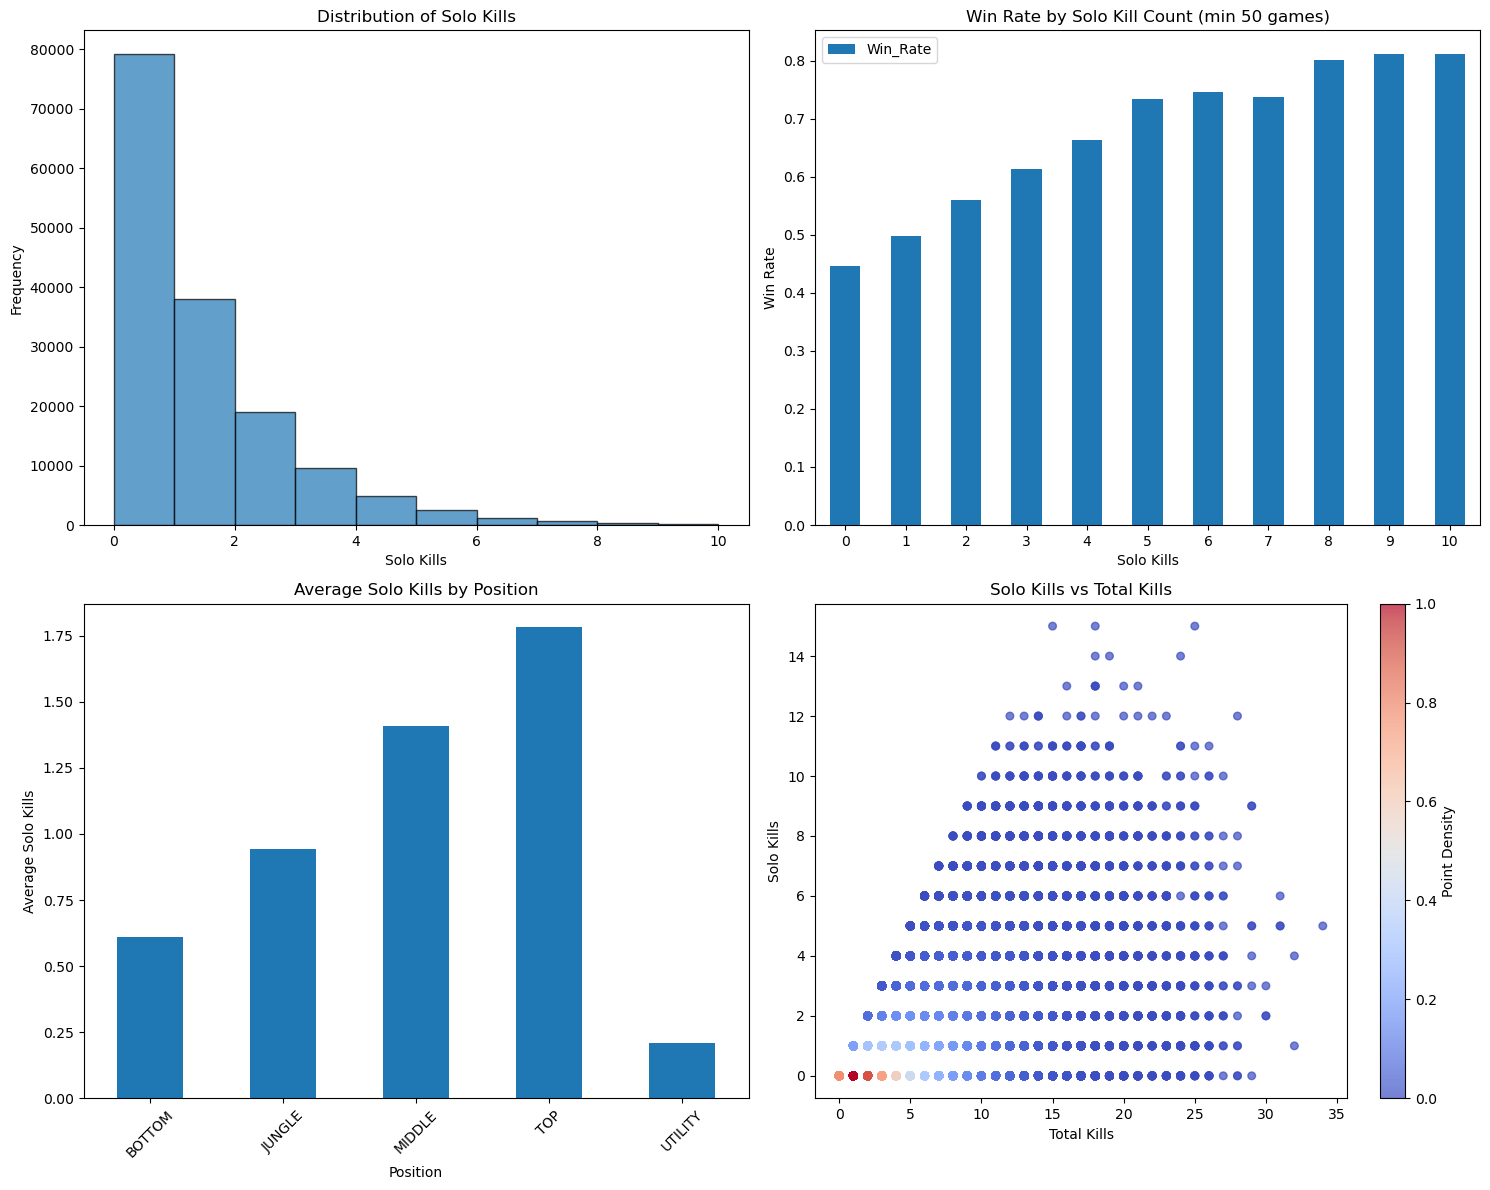

In [29]:
# Solo Kills Correlation with Win Rate EDA
print(f"Total games: {len(cleaned_df)}")
print(f"Games with solo kills: {(cleaned_df['soloKills'] > 0).sum()}")
print(f"Percentage with solo kills: {(cleaned_df['soloKills'] > 0).mean() * 100:.2f}%")

# Solo kills by win/loss
win_loss_solo = cleaned_df.groupby('win')['soloKills'].agg(['count', 'mean', 'std']).round(3)
print(f"\nSolo Kills by Win/Loss:")
print(win_loss_solo)

# --- Changes are here ---
# Win rate by solo kill count
solo_kill_win_rates = cleaned_df.groupby('soloKills')['win'].agg(['count', 'mean']).round(3)
solo_kill_win_rates.columns = ['Games', 'Win_Rate']
# Filter for statistical significance
solo_kill_win_rates = solo_kill_win_rates[solo_kill_win_rates['Games'] >= 50]
print(f"\nWin Rate by Solo Kill Count (min 50 games):")
print(solo_kill_win_rates)
# --- End of changes ---

# Solo kills by position
position_solo = cleaned_df.groupby('teamPosition')['soloKills'].agg(['count', 'mean']).round(3)
print(f"\nSolo Kills by Position:")
print(position_solo)

# Top champions by solo kills (min 50 games)
champ_solo = cleaned_df.groupby('championName')['soloKills'].agg(['count', 'mean']).round(3)
champ_solo_filtered = champ_solo[champ_solo['count'] >= 50].sort_values('mean', ascending=False)
print(f"\nTop 10 Champions by Solo Kills (min 50 games):")
print(champ_solo_filtered.head(10))

# Correlation with other metrics
correlation_columns = ['soloKills', 'kills', 'deaths', 'assists', 'damagePerMinute', 'totalDamageDealtToChampions', 'goldEarned']
correlation_matrix = cleaned_df[correlation_columns].corr()
print(f"\nCorrelation with Solo Kills:")
print(correlation_matrix['soloKills'].sort_values(ascending=False))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Solo kills distribution
axes[0,0].hist(cleaned_df['soloKills'], bins=range(0, 11), alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribution of Solo Kills')
axes[0,0].set_xlabel('Solo Kills')
axes[0,0].set_ylabel('Frequency')

# 2. Win rate by solo kills (now uses the filtered data)
solo_kill_win_rates.plot(kind='bar', ax=axes[0,1], y='Win_Rate')
axes[0,1].set_title('Win Rate by Solo Kill Count (min 50 games)')
axes[0,1].set_xlabel('Solo Kills')
axes[0,1].set_ylabel('Win Rate')
axes[0,1].tick_params(axis='x', rotation=0)

# 3. Solo kills by position
position_solo['mean'].plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Solo Kills by Position')
axes[1,0].set_xlabel('Position')
axes[1,0].set_ylabel('Average Solo Kills')
axes[1,0].tick_params(axis='x', rotation=45)


# 4. Solo kills vs total kills scatter with density coloring
from scipy.stats import gaussian_kde

x = cleaned_df['kills']
y = cleaned_df['soloKills']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Normalize z to spread colors more evenly
z_normalized = (z - z.min()) / (z.max() - z.min())

scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='coolwarm')
axes[1,1].set_title('Solo Kills vs Total Kills')
axes[1,1].set_xlabel('Total Kills')
axes[1,1].set_ylabel('Solo Kills')

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes[1,1])
cbar.set_label('Point Density')


plt.tight_layout()
plt.show()

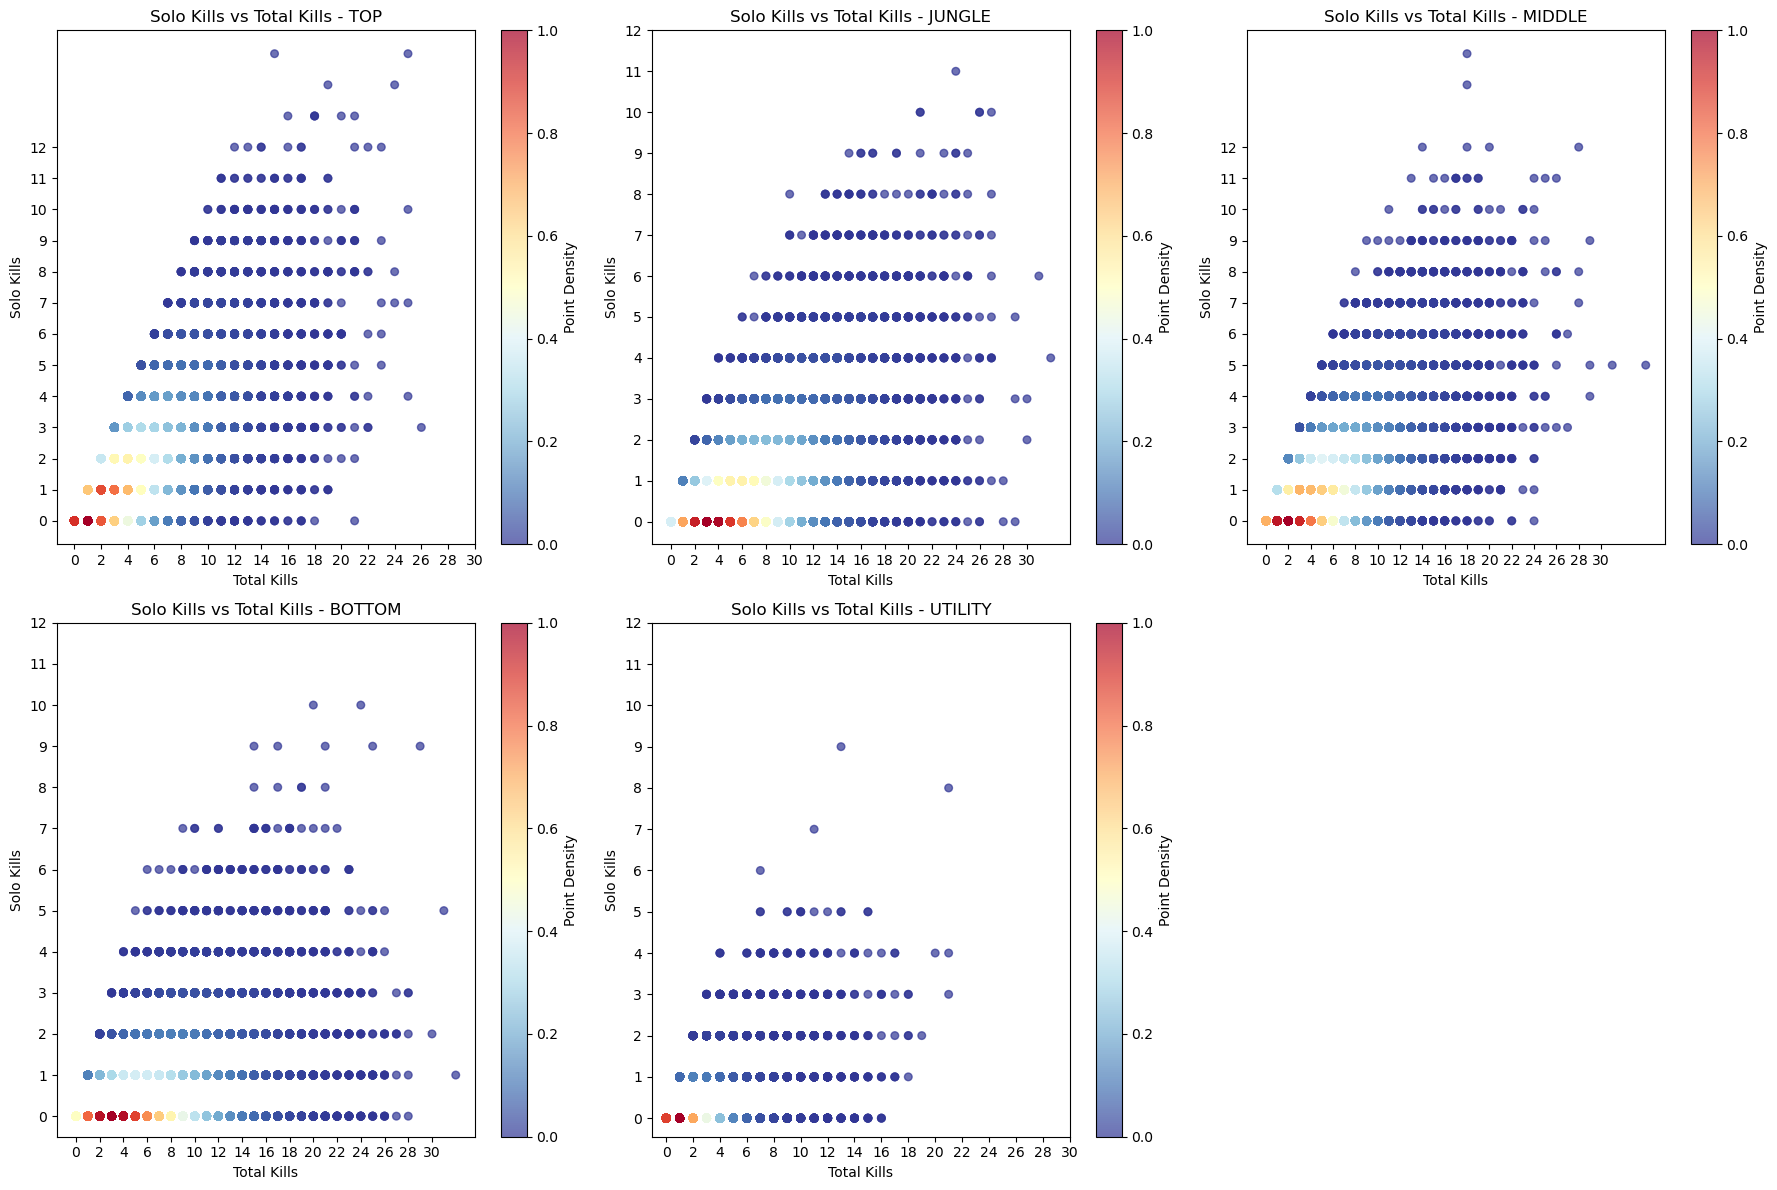

In [30]:
# Solo kills vs total kills scatter by position
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
positions = ['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'UTILITY']


# Option 1: Use 'viridis' for better contrast
# scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='viridis')

# Option 2: Use 'plasma' for bright colors
# scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='plasma')

# Option 3: Use 'hot' for fire-like colors (dark to bright)
# scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='hot')

# Option 4: Use 'RdYlBu_r' (red-yellow-blue reversed) for better contrast
# scatter = axes[1,1].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='RdYlBu_r')

for i, position in enumerate(positions):
    row = i // 3
    col = i % 3
    
    pos_data = cleaned_df[cleaned_df['teamPosition'] == position]
    x = pos_data['kills']
    y = pos_data['soloKills']
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    z_normalized = (z - z.min()) / (z.max() - z.min())
    
    scatter = axes[row, col].scatter(x, y, c=z_normalized, s=30, alpha=0.7, cmap='RdYlBu_r')
    axes[row, col].set_title(f'Solo Kills vs Total Kills - {position}')
    axes[row, col].set_xlabel('Total Kills')
    axes[row, col].set_ylabel('Solo Kills')
    axes[row, col].set_xticks(range(0, 32, 2))
    axes[row, col].set_yticks(range(0, 13, 1))
    
    cbar = plt.colorbar(scatter, ax=axes[row, col])
    cbar.set_label('Point Density')

# Remove the empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

In [31]:
# Group by position and solo kills, then calculate win rate and game count
win_rate_by_lane_solo_kills = cleaned_df.groupby(['teamPosition', 'soloKills'])['win'].agg(['mean', 'count']).round(3)

# Rename columns for clarity
win_rate_by_lane_solo_kills.columns = ['Win_Rate', 'Games']

# Display the results for each position
print("=== Win Rate by Solo Kills for Each Lane ===\n")

# Get unique positions sorted for consistent output
positions = sorted(cleaned_df['teamPosition'].unique())

for position in positions:
    print(f"--- {position} ---")
    
    # Use .loc to select data for the current position from the multi-index
    position_data = win_rate_by_lane_solo_kills.loc[position]
    
    # Display the win rates, filtering for a reasonable number of games to ensure statistical significance
    print(position_data[position_data['Games'] >= 20])
    print("\n" + "="*30 + "\n")

=== Win Rate by Solo Kills for Each Lane ===

--- BOTTOM ---
           Win_Rate  Games
soloKills                 
0             0.459  18874
1             0.529   7949
2             0.601   2779
3             0.654    990
4             0.686    338
5             0.770    122
6             0.731     52
7             0.773     22


--- JUNGLE ---
           Win_Rate  Games
soloKills                 
0             0.428  14735
1             0.513   8994
2             0.593   4214
3             0.647   1817
4             0.686    810
5             0.736    307
6             0.729    144
7             0.710     69
8             0.800     30


--- MIDDLE ---
           Win_Rate  Games
soloKills                 
0             0.394  11116
1             0.486   8620
2             0.558   5305
3             0.605   2907
4             0.668   1578
5             0.742    783
6             0.754    418
7             0.790    224
8             0.804    107
9             0.783     46


--- TOP ---


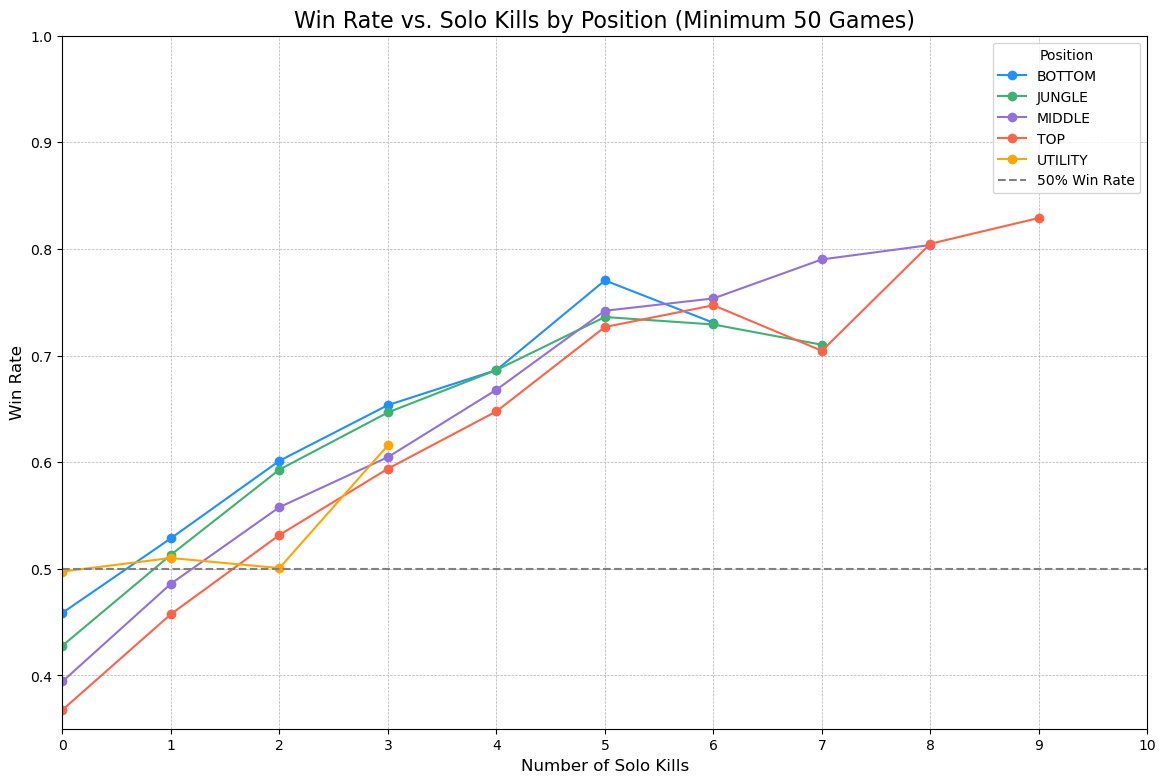

In [32]:
# Group data by position and solo kills to calculate win rate and game count
win_rate_by_lane = cleaned_df.groupby(['teamPosition', 'soloKills'])['win'].agg(['mean', 'count']).reset_index()
win_rate_by_lane.columns = ['teamPosition', 'soloKills', 'Win_Rate', 'Games']

# Set up the plot
plt.figure(figsize=(14, 9))
colors = {'TOP': 'tomato', 'JUNGLE': 'mediumseagreen', 'MIDDLE': 'mediumpurple', 'BOTTOM': 'dodgerblue', 'UTILITY': 'orange'}
positions = sorted(cleaned_df['teamPosition'].unique())

# Plot a line for each position
for position in positions:
    # Filter data for the current position and ensure a minimum number of games for statistical relevance
    position_data = win_rate_by_lane[
        (win_rate_by_lane['teamPosition'] == position) & 
        (win_rate_by_lane['Games'] >= 50)
    ]
    
    if not position_data.empty:
        plt.plot(position_data['soloKills'], position_data['Win_Rate'], marker='o', linestyle='-', label=position, color=colors.get(position, 'black'))

# Add plot details
plt.title('Win Rate vs. Solo Kills by Position (Minimum 50 Games)', fontsize=16)
plt.xlabel('Number of Solo Kills', fontsize=12)
plt.ylabel('Win Rate', fontsize=12)
plt.axhline(y=0.5, color='grey', linestyle='--', label='50% Win Rate')
plt.legend(title='Position')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# --- Changes are here ---
# Set x-axis ticks to go from 0 to 10
plt.xticks(range(0, 11))
# Set the x-axis limit to stop at 10
plt.xlim(0, 10)
# --- End of changes ---

plt.ylim(0.35, 1.0)
plt.show()

**Key Takeaways:**
- Top has the highest number of solo kills due to top being the most isolated lane
- Bottom and Utility both have the lowest, as it is the only lane where there are two players 

### First Blood Kill

=== First Blood Kill Impact on Win Rate ===

--- Overall Win Rate by First Blood ---
                         Win_Rate   Games
Did Not Get First Blood     0.492  140238
Got First Blood             0.572   15452


--- Win Rate by Position for Getting First Blood ---
              Win_Rate_with_FB  First_Bloods
teamPosition                                
JUNGLE                   0.593          3458
TOP                      0.572          3298
BOTTOM                   0.567          3937
MIDDLE                   0.564          2893
UTILITY                  0.557          1866


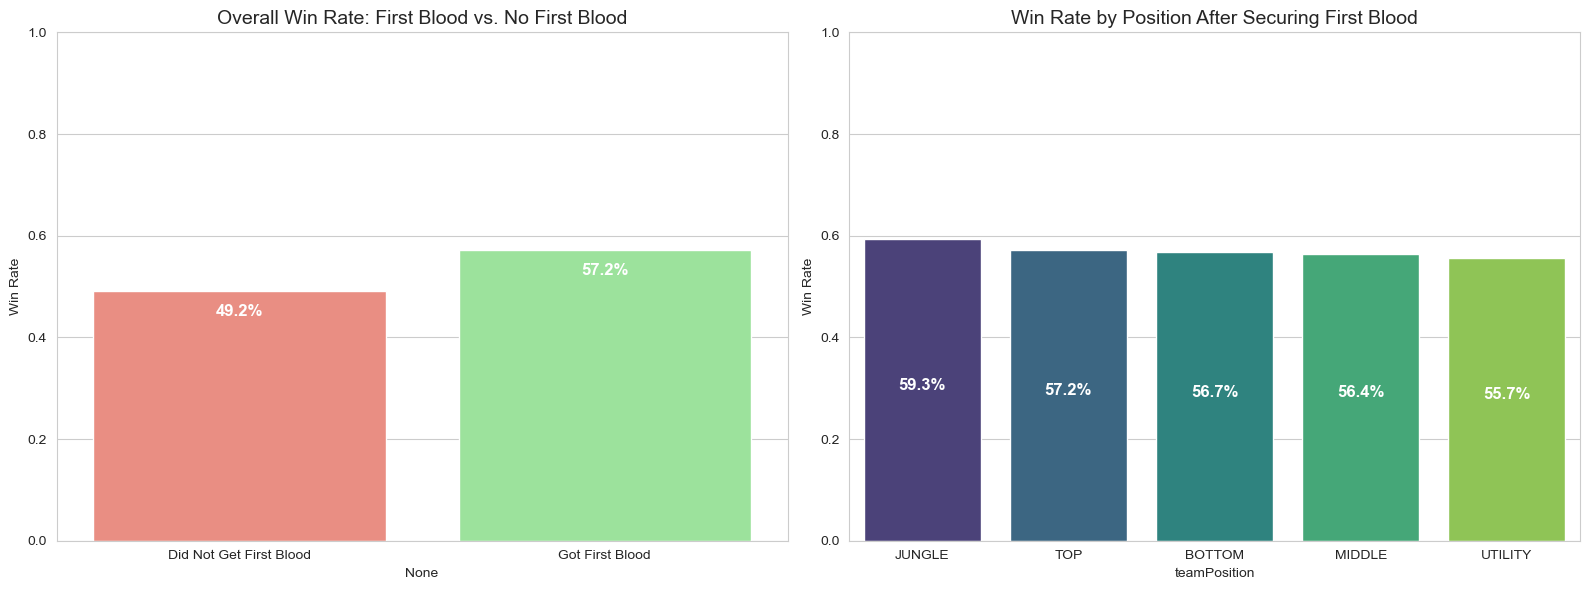

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Overall First Blood Impact ---
print("=== First Blood Kill Impact on Win Rate ===\n")

# Calculate win rate for players who got first blood vs. those who didn't
fb_win_rate = cleaned_df.groupby('firstBloodKill')['win'].agg(['mean', 'count']).round(3)
fb_win_rate.columns = ['Win_Rate', 'Games']
fb_win_rate.index = ['Did Not Get First Blood', 'Got First Blood']

print("--- Overall Win Rate by First Blood ---")
print(fb_win_rate)
print("\n" + "="*40 + "\n")


# --- 2. First Blood Impact by Position ---
print("--- Win Rate by Position for Getting First Blood ---")

# Group by position for players who secured first blood
fb_by_position = cleaned_df[cleaned_df['firstBloodKill'] == True].groupby('teamPosition')['win'].agg(['mean', 'count']).round(3)
fb_by_position.columns = ['Win_Rate_with_FB', 'First_Bloods']
fb_by_position = fb_by_position.sort_values('Win_Rate_with_FB', ascending=False)

print(fb_by_position)


# --- 3. Visualizations ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("whitegrid")

# Bar chart for overall win rate
# --- FIX: Updated to modern seaborn standard ---
sns.barplot(x=fb_win_rate.index, y=fb_win_rate['Win_Rate'], ax=axes[0], hue=fb_win_rate.index, palette=['salmon', 'lightgreen'], legend=False)
axes[0].set_title('Overall Win Rate: First Blood vs. No First Blood', fontsize=14)
axes[0].set_ylabel('Win Rate')
axes[0].set_ylim(0, 1.0)
# Add percentage labels
for index, value in enumerate(fb_win_rate['Win_Rate']):
    axes[0].text(index, value - 0.05, f'{value:.1%}', ha='center', color='white', fontsize=12, weight='bold')


# Bar chart for win rate by position
# --- FIX: Updated to modern seaborn standard ---
sns.barplot(x=fb_by_position.index, y=fb_by_position['Win_Rate_with_FB'], ax=axes[1], hue=fb_by_position.index, palette='viridis', legend=False)
axes[1].set_title('Win Rate by Position After Securing First Blood', fontsize=14)
axes[1].set_ylabel('Win Rate')
axes[1].set_ylim(0, 1.0)
# Add percentage labels
for index, value in enumerate(fb_by_position['Win_Rate_with_FB']):
    axes[1].text(index, value / 2, f'{value:.1%}', ha='center', color='white', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


**Key Takeaway**
- Teams/players that gets first Blood has a 57.2% Win Rate
- The highest win rate is Jungle, 59.3% Win Rate after getting first blood. This can be explained by jungler's ability to control more of the map while being ahead

### Damage Per Minute

=== Damage Per Minute (DPM) Correlation with Win Rate ===

--- Average DPM in Wins vs. Losses ---
        mean     std
Loss  613.17  286.31
Win   749.91  334.11


--- Average DPM by Position ---
teamPosition
BOTTOM     797.34
MIDDLE     790.12
TOP        760.55
JUNGLE     682.73
UTILITY    376.96
Name: damagePerMinute, dtype: float64


--- Win Rate Across DPM Ranges (min 50 games) ---
           Win_Rate  Games
dpm_bins                  
0-200         0.318   4453
201-400       0.399  27982
401-600       0.416  35801
601-800       0.494  36920
801-1000      0.586  26224
1001-1200     0.658  14111
1200+         0.736  10199




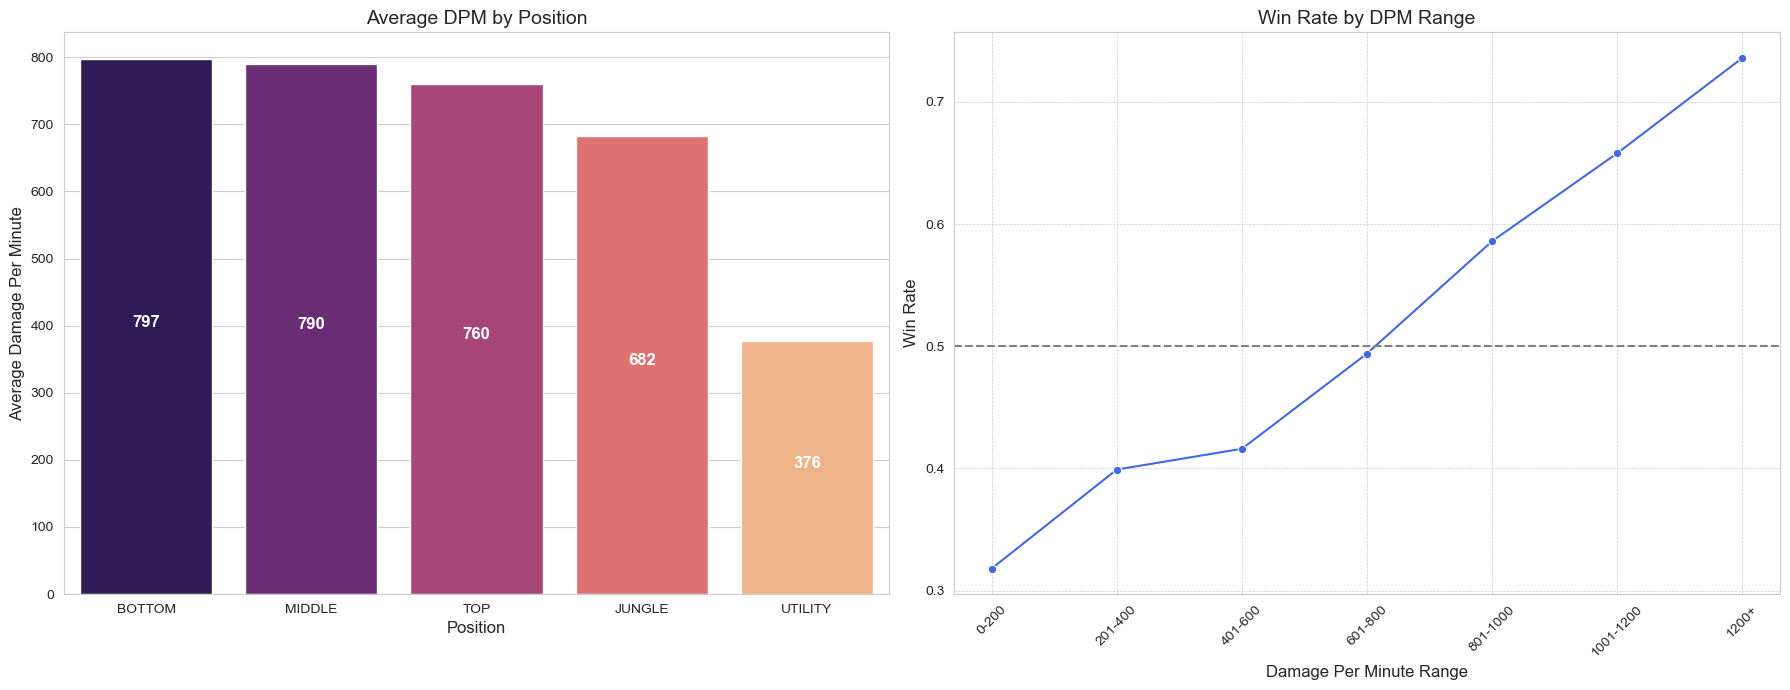

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Overall DPM for Wins vs. Losses ---
print("=== Damage Per Minute (DPM) Correlation with Win Rate ===\n")

# Calculate average DPM for winning and losing games
dpm_win_loss = cleaned_df.groupby('win')['damagePerMinute'].agg(['mean', 'std']).round(2)
dpm_win_loss.index = ['Loss', 'Win']

print("--- Average DPM in Wins vs. Losses ---")
print(dpm_win_loss)
print("\n" + "="*40 + "\n")


# --- 2. DPM by Position ---
print("--- Average DPM by Position ---")

# Calculate the average DPM for each role
dpm_by_position = cleaned_df.groupby('teamPosition')['damagePerMinute'].mean().round(2).sort_values(ascending=False)

print(dpm_by_position)
print("\n" + "="*40 + "\n")


# --- 3. Win Rate by DPM Bins ---
print("--- Win Rate Across DPM Ranges (min 50 games) ---")

# Create DPM bins to analyze win rate across different damage brackets
bins = [0, 200, 400, 600, 800, 1000, 1200, np.inf]
labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '1200+']
cleaned_df['dpm_bins'] = pd.cut(cleaned_df['damagePerMinute'], bins=bins, labels=labels, right=False)

# Calculate win rate for each DPM bin
# --- FIX: Added observed=False to silence the warning and maintain current behavior ---
win_rate_by_dpm = cleaned_df.groupby('dpm_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_dpm.columns = ['Win_Rate', 'Games']
# Filter for bins with enough games to be statistically significant
win_rate_by_dpm = win_rate_by_dpm[win_rate_by_dpm['Games'] >= 50]

print(win_rate_by_dpm)
print("\n" + "="*40 + "\n")

# --- 5. Visualizations ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.set_style("whitegrid")

# Bar chart for DPM by position
sns.barplot(x=dpm_by_position.index, y=dpm_by_position.values, ax=axes[0], hue=dpm_by_position.index, palette='magma', legend=False)
axes[0].set_title('Average DPM by Position', fontsize=14)
axes[0].set_xlabel('Position', fontsize=12)
axes[0].set_ylabel('Average Damage Per Minute', fontsize=12)
for index, value in enumerate(dpm_by_position.values):
    axes[0].text(index, value / 2, f'{int(value)}', ha='center', color='white', fontsize=12, weight='bold')


# Line plot for Win Rate by DPM Bins
sns.lineplot(x=win_rate_by_dpm.index, y=win_rate_by_dpm['Win_Rate'], ax=axes[1], marker='o', color='royalblue')
axes[1].set_title('Win Rate by DPM Range', fontsize=14)
axes[1].set_xlabel('Damage Per Minute Range', fontsize=12)
axes[1].set_ylabel('Win Rate', fontsize=12)
axes[1].axhline(y=0.5, color='grey', linestyle='--', label='50% Win Rate')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)


plt.tight_layout()
plt.show()


**Key Takeaways**
- Bottom lane has th3e highest average damage per minute. Most champions are ranged in this category, and their identity is to deal damage (Attack Damage Carry)
- There is a steep upwards trend with higher DPM and Win Rate

### Kills Deaths and Assists

=== KDA Correlation with Win Rate ===

--- Average KDA in Wins vs. Losses ---
      kills  deaths  assists
Loss   4.15    6.62     6.09
Win    6.60    4.17    10.11


--- Average KDA by Position ---
              kills  deaths  assists
teamPosition                        
BOTTOM         6.57    5.49     6.95
JUNGLE         7.08    5.19     7.95
MIDDLE         6.01    5.28     6.58
TOP            4.97    5.46     5.39
UTILITY        2.26    5.56    13.63


--- Win Rate by Binned Stats (min 50 games) ---

Kills:
           Win_Rate  Games
kill_bins                 
0             0.269  11392
1-2           0.356  34605
3-4           0.434  32427
5-6           0.525  25872
7-8           0.600  19211
9-10          0.670  13060
11+           0.759  19123

Deaths:
            Win_Rate  Games
death_bins                 
0              0.949   4786
1-2            0.839  23163
3-4            0.621  36272
5-6            0.432  38595
7-8            0.309  28808
9-10           0.248  15541
11+     

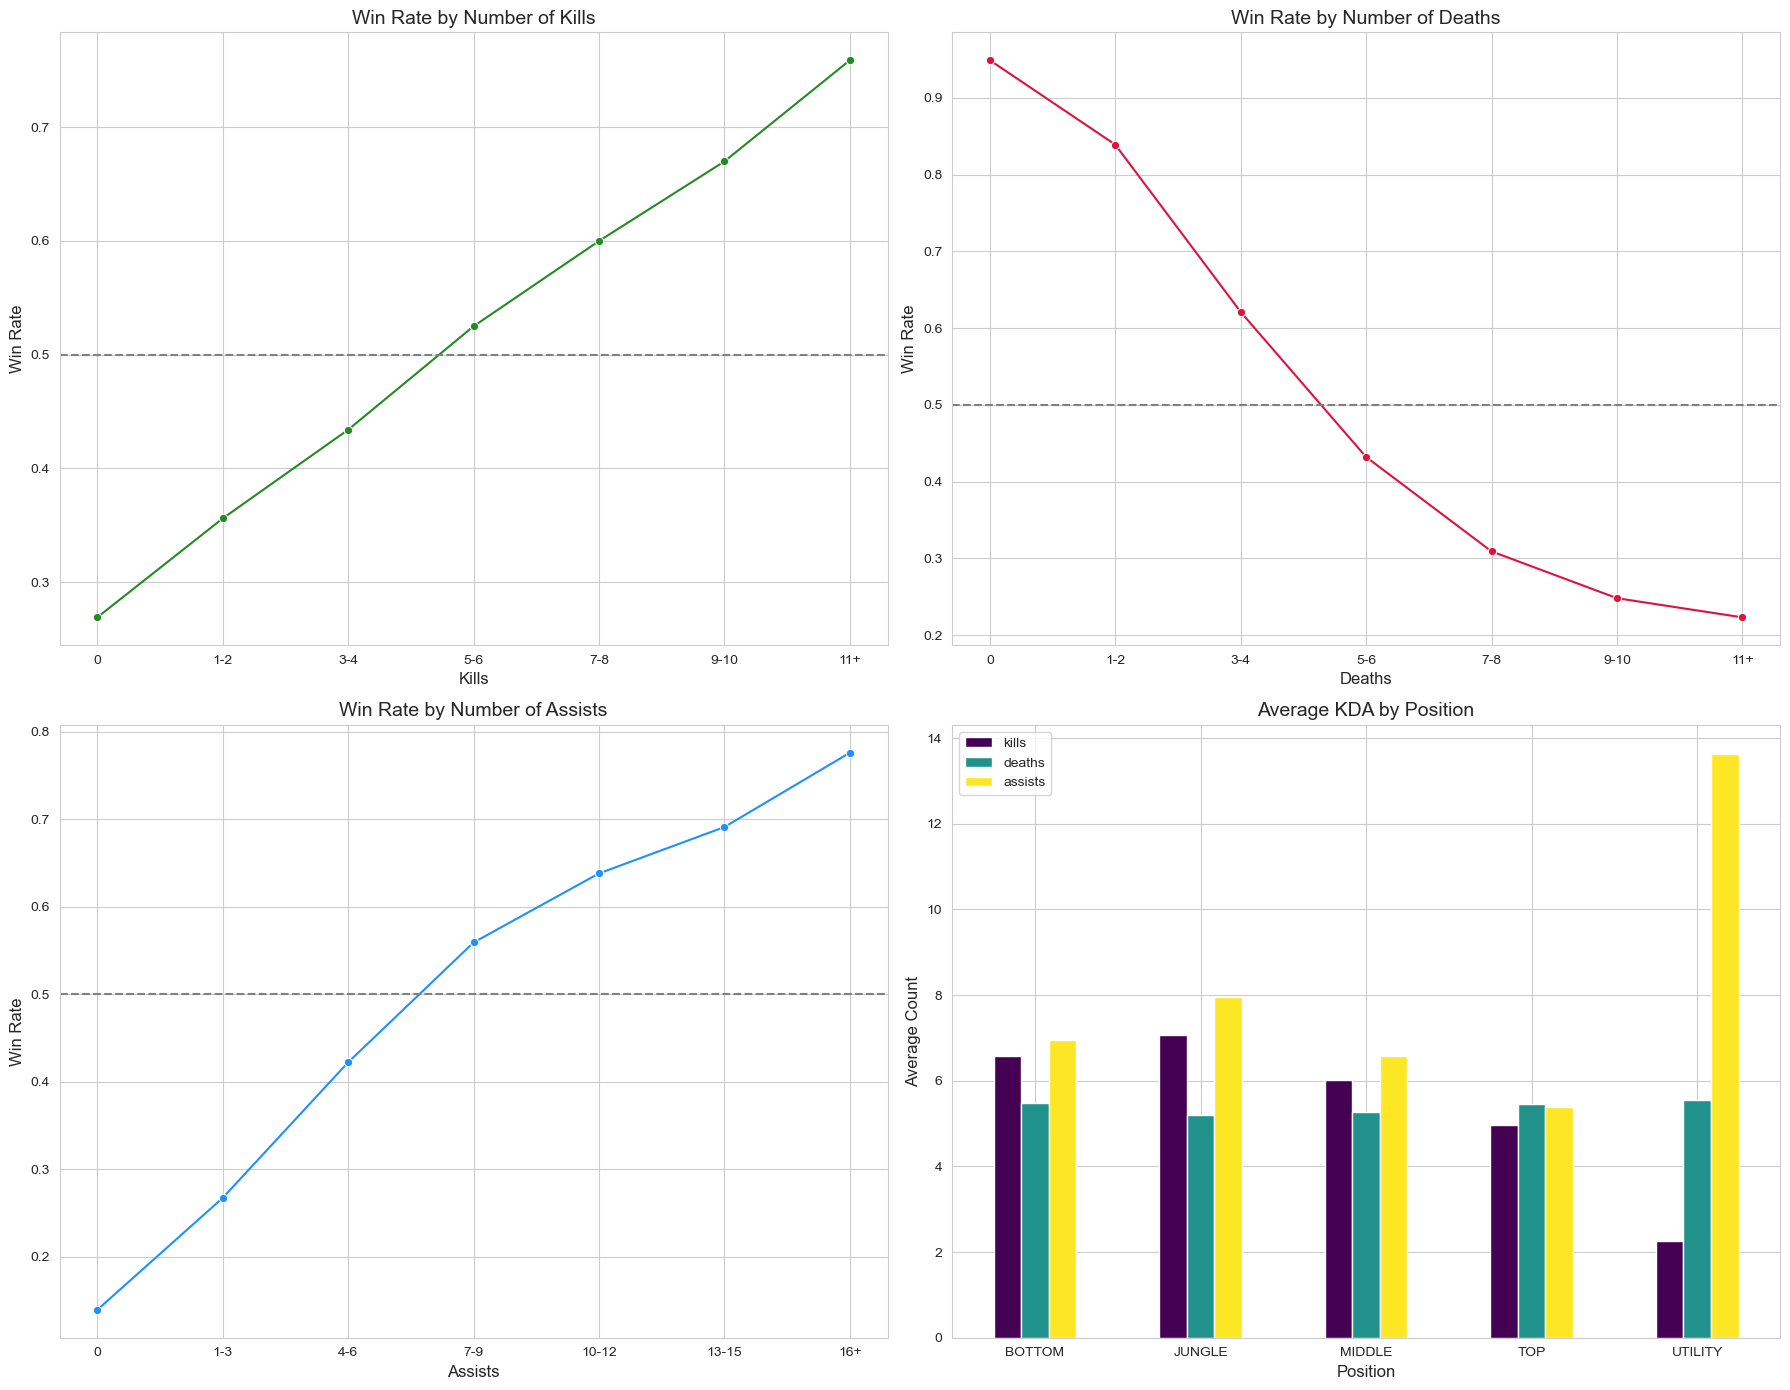

In [46]:
# --- 1. Overall KDA for Wins vs. Losses ---
print("=== KDA Correlation with Win Rate ===\n")

# Calculate the average KDA for winning and losing games
kda_win_loss = cleaned_df.groupby('win')[['kills', 'deaths', 'assists']].mean().round(2)
kda_win_loss.index = ['Loss', 'Win']

print("--- Average KDA in Wins vs. Losses ---")
print(kda_win_loss)
print("\n" + "="*40 + "\n")


# --- 2. KDA by Position ---
print("--- Average KDA by Position ---")

# Calculate the average KDA for each role
kda_by_position = cleaned_df.groupby('teamPosition')[['kills', 'deaths', 'assists']].mean().round(2)

print(kda_by_position)
print("\n" + "="*40 + "\n")


# --- 3. Win Rate by KDA Bins ---
# We create bins for each stat to see how win probability changes as they increase.

# Kills Bins
bins_k = [-1, 0, 2, 4, 6, 8, 10, np.inf]
labels_k = ['0', '1-2', '3-4', '5-6', '7-8', '9-10', '11+']
cleaned_df['kill_bins'] = pd.cut(cleaned_df['kills'], bins=bins_k, labels=labels_k, right=True)
win_rate_by_kills = cleaned_df.groupby('kill_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_kills.columns = ['Win_Rate', 'Games']

# Deaths Bins
bins_d = [-1, 0, 2, 4, 6, 8, 10, np.inf]
labels_d = ['0', '1-2', '3-4', '5-6', '7-8', '9-10', '11+']
cleaned_df['death_bins'] = pd.cut(cleaned_df['deaths'], bins=bins_d, labels=labels_d, right=True)
win_rate_by_deaths = cleaned_df.groupby('death_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_deaths.columns = ['Win_Rate', 'Games']

# Assists Bins
bins_a = [-1, 0, 3, 6, 9, 12, 15, np.inf]
labels_a = ['0', '1-3', '4-6', '7-9', '10-12', '13-15', '16+']
cleaned_df['assist_bins'] = pd.cut(cleaned_df['assists'], bins=bins_a, labels=labels_a, right=True)
win_rate_by_assists = cleaned_df.groupby('assist_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_assists.columns = ['Win_Rate', 'Games']

print("--- Win Rate by Binned Stats (min 50 games) ---")
print("\nKills:")
print(win_rate_by_kills[win_rate_by_kills['Games'] >= 50])
print("\nDeaths:")
print(win_rate_by_deaths[win_rate_by_deaths['Games'] >= 50])
print("\nAssists:")
print(win_rate_by_assists[win_rate_by_assists['Games'] >= 50])
print("\n" + "="*40 + "\n")


# --- 4. Visualizations ---
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
sns.set_style("whitegrid")

# Plot 1: Win Rate by Kills
sns.lineplot(x=win_rate_by_kills.index, y=win_rate_by_kills['Win_Rate'], ax=axes[0, 0], marker='o', color='forestgreen')
axes[0, 0].set_title('Win Rate by Number of Kills', fontsize=14)
axes[0, 0].set_xlabel('Kills', fontsize=12)
axes[0, 0].set_ylabel('Win Rate', fontsize=12)
axes[0, 0].axhline(y=0.5, color='grey', linestyle='--')

# Plot 2: Win Rate by Deaths
sns.lineplot(x=win_rate_by_deaths.index, y=win_rate_by_deaths['Win_Rate'], ax=axes[0, 1], marker='o', color='crimson')
axes[0, 1].set_title('Win Rate by Number of Deaths', fontsize=14)
axes[0, 1].set_xlabel('Deaths', fontsize=12)
axes[0, 1].set_ylabel('Win Rate', fontsize=12)
axes[0, 1].axhline(y=0.5, color='grey', linestyle='--')

# Plot 3: Win Rate by Assists
sns.lineplot(x=win_rate_by_assists.index, y=win_rate_by_assists['Win_Rate'], ax=axes[1, 0], marker='o', color='dodgerblue')
axes[1, 0].set_title('Win Rate by Number of Assists', fontsize=14)
axes[1, 0].set_xlabel('Assists', fontsize=12)
axes[1, 0].set_ylabel('Win Rate', fontsize=12)
axes[1, 0].axhline(y=0.5, color='grey', linestyle='--')

# Plot 4: KDA by Position
kda_by_position.plot(kind='bar', ax=axes[1, 1], colormap='viridis')
axes[1, 1].set_title('Average KDA by Position', fontsize=14)
axes[1, 1].set_xlabel('Position', fontsize=12)
axes[1, 1].set_ylabel('Average Count', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


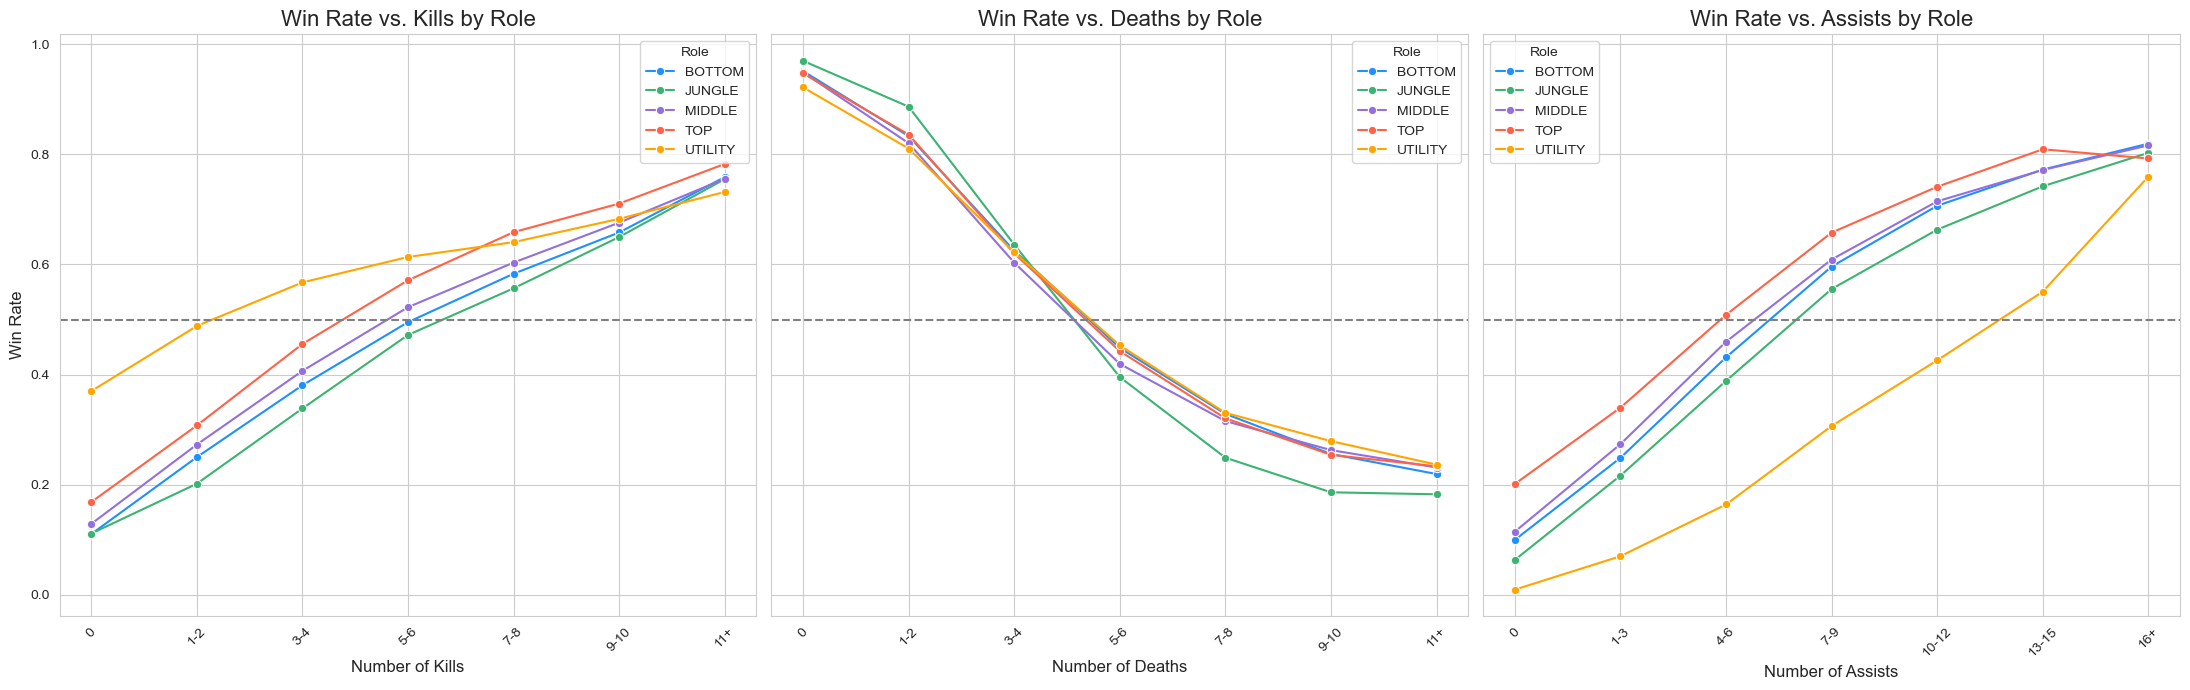

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preparation ---
# We'll use the same bins as the previous analysis for consistency.
# It's good practice to redefine them here to make the cell self-contained.

# Kills Bins
bins_k = [-1, 0, 2, 4, 6, 8, 10, np.inf]
labels_k = ['0', '1-2', '3-4', '5-6', '7-8', '9-10', '11+']
cleaned_df['kill_bins'] = pd.cut(cleaned_df['kills'], bins=bins_k, labels=labels_k, right=True)

# Deaths Bins
bins_d = [-1, 0, 2, 4, 6, 8, 10, np.inf]
labels_d = ['0', '1-2', '3-4', '5-6', '7-8', '9-10', '11+']
cleaned_df['death_bins'] = pd.cut(cleaned_df['deaths'], bins=bins_d, labels=labels_d, right=True)

# Assists Bins
bins_a = [-1, 0, 3, 6, 9, 12, 15, np.inf]
labels_a = ['0', '1-3', '4-6', '7-9', '10-12', '13-15', '16+']
cleaned_df['assist_bins'] = pd.cut(cleaned_df['assists'], bins=bins_a, labels=labels_a, right=True)

# Group data by role and the binned stats
win_rate_kills_role = cleaned_df.groupby(['teamPosition', 'kill_bins'], observed=False)['win'].agg(['mean', 'count']).reset_index()
win_rate_deaths_role = cleaned_df.groupby(['teamPosition', 'death_bins'], observed=False)['win'].agg(['mean', 'count']).reset_index()
win_rate_assists_role = cleaned_df.groupby(['teamPosition', 'assist_bins'], observed=False)['win'].agg(['mean', 'count']).reset_index()


# --- Visualizations ---
fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=True)
sns.set_style("whitegrid")
colors = {'TOP': 'tomato', 'JUNGLE': 'mediumseagreen', 'MIDDLE': 'mediumpurple', 'BOTTOM': 'dodgerblue', 'UTILITY': 'orange'}
positions = sorted(cleaned_df['teamPosition'].unique())

# --- Plot 1: Win Rate vs. Kills by Role ---
axes[0].set_title('Win Rate vs. Kills by Role', fontsize=16)
for position in positions:
    # Filter for the current role and for statistical significance
    data = win_rate_kills_role[(win_rate_kills_role['teamPosition'] == position) & (win_rate_kills_role['count'] >= 50)]
    sns.lineplot(x='kill_bins', y='mean', data=data, ax=axes[0], label=position, color=colors[position], marker='o')
axes[0].set_xlabel('Number of Kills', fontsize=12)
axes[0].set_ylabel('Win Rate', fontsize=12)
axes[0].axhline(y=0.5, color='grey', linestyle='--')
axes[0].legend(title='Role')
axes[0].tick_params(axis='x', rotation=45)

# --- Plot 2: Win Rate vs. Deaths by Role ---
axes[1].set_title('Win Rate vs. Deaths by Role', fontsize=16)
for position in positions:
    data = win_rate_deaths_role[(win_rate_deaths_role['teamPosition'] == position) & (win_rate_deaths_role['count'] >= 50)]
    sns.lineplot(x='death_bins', y='mean', data=data, ax=axes[1], label=position, color=colors[position], marker='o')
axes[1].set_xlabel('Number of Deaths', fontsize=12)
axes[1].set_ylabel('') # Hide redundant y-axis label
axes[1].axhline(y=0.5, color='grey', linestyle='--')
axes[1].legend(title='Role')
axes[1].tick_params(axis='x', rotation=45)

# --- Plot 3: Win Rate vs. Assists by Role ---
axes[2].set_title('Win Rate vs. Assists by Role', fontsize=16)
for position in positions:
    data = win_rate_assists_role[(win_rate_assists_role['teamPosition'] == position) & (win_rate_assists_role['count'] >= 50)]
    sns.lineplot(x='assist_bins', y='mean', data=data, ax=axes[2], label=position, color=colors[position], marker='o')
axes[2].set_xlabel('Number of Assists', fontsize=12)
axes[2].set_ylabel('') # Hide redundant y-axis label
axes[2].axhline(y=0.5, color='grey', linestyle='--')
axes[2].legend(title='Role')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Creep Score

=== Creep Score (CS) Analysis for Laning Roles ===

--- Average CS Metrics in Wins vs. Losses (for Laners) ---
      csPerMinute  laneMinionsFirst10Minutes  maxCsAdvantageOnLaneOpponent
Loss         6.93                      66.68                         21.00
Win          7.26                      69.09                         29.67


--- Average CS Metrics by Position ---
              csPerMinute  laneMinionsFirst10Minutes  \
teamPosition                                           
BOTTOM               7.23                      62.36   
MIDDLE               7.07                      72.32   
TOP                  7.00                      68.98   

              maxCsAdvantageOnLaneOpponent  
teamPosition                                
BOTTOM                               24.85  
MIDDLE                               24.60  
TOP                                  26.56  


--- Win Rate by Max CS Advantage on Lane Opponent ---
             Win_Rate  Games
cs_adv_bins                 
0  

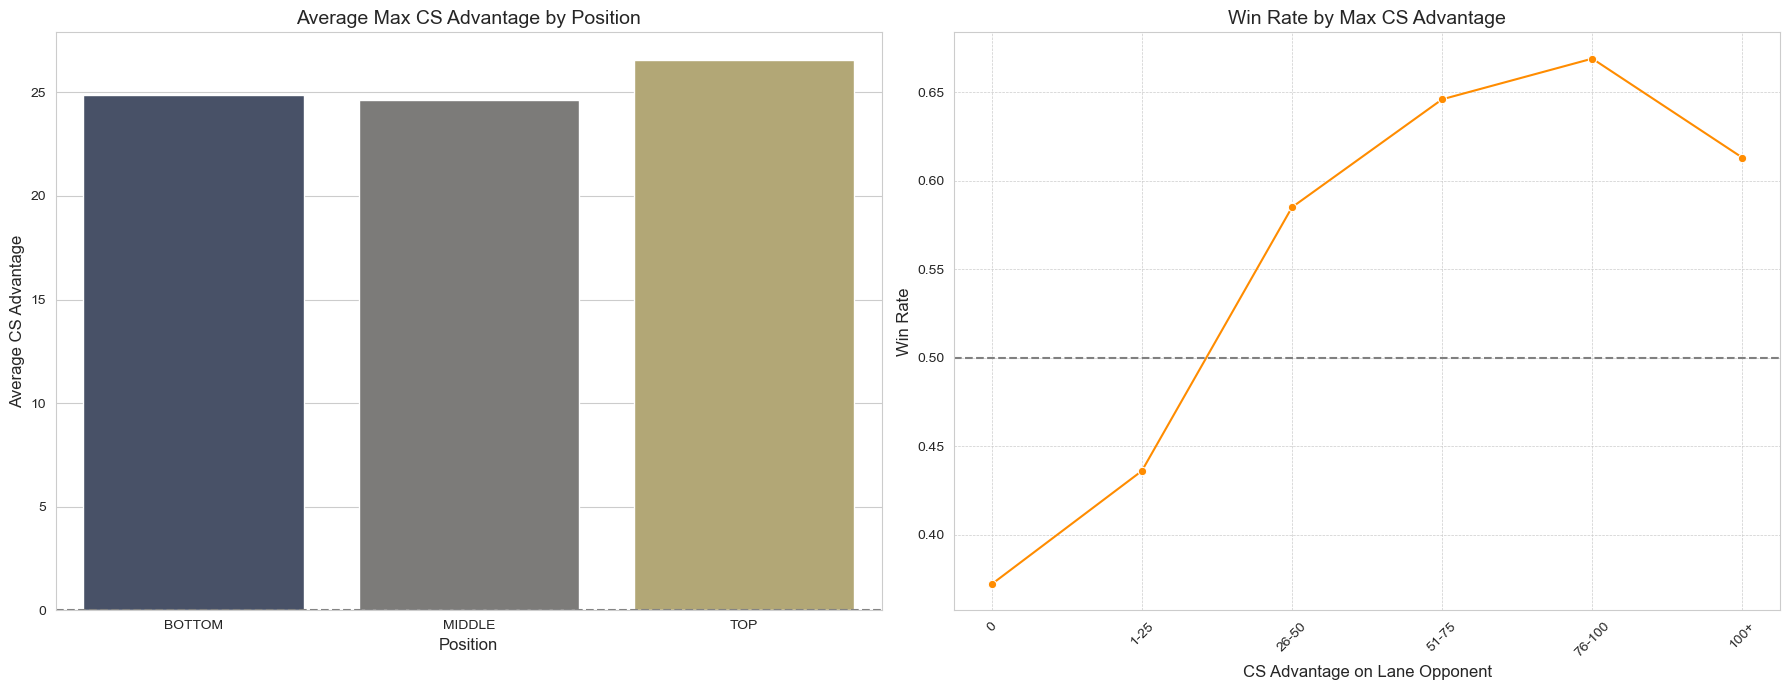

In [53]:
# Filter the DataFrame to only include the three laning roles.
laner_roles = ['TOP', 'MIDDLE', 'BOTTOM']
laner_df = cleaned_df[cleaned_df['teamPosition'].isin(laner_roles)].copy()

# Calculate CS Per Minute, a standardized metric for farm rate.
# Ensure gameDuration is not zero to avoid division errors.
laner_df['csPerMinute'] = laner_df.apply(
    lambda row: row['totalMinionsKilled'] / (row['gameDuration'] / 60) if row['gameDuration'] > 0 else 0,
    axis=1
)

print("=== Creep Score (CS) Analysis for Laning Roles ===\n")

# --- 2. Overall CS Metrics for Wins vs. Losses ---
print("--- Average CS Metrics in Wins vs. Losses (for Laners) ---")

# Define the key CS metrics we want to analyze
cs_metrics = ['csPerMinute', 'laneMinionsFirst10Minutes', 'maxCsAdvantageOnLaneOpponent']
cs_win_loss = laner_df.groupby('win')[cs_metrics].mean().round(2)
cs_win_loss.index = ['Loss', 'Win']

print(cs_win_loss)
print("\n" + "="*50 + "\n")

# --- 3. CS Metrics by Position ---
print("--- Average CS Metrics by Position ---")

cs_by_position = laner_df.groupby('teamPosition')[cs_metrics].mean().round(2)
print(cs_by_position)
print("\n" + "="*50 + "\n")

# --- 4. Win Rate by CS Advantage ---
print("--- Win Rate by Max CS Advantage on Lane Opponent ---")

# Create bins for CS advantage to see how win rate scales with a farming lead.
bins_cs = [-np.inf, -50, -25, -1, 0, 25, 50, 75, 100, np.inf]
labels_cs = ['-50+', '-49 to -25', '-24 to -1', '0', '1-25', '26-50', '51-75', '76-100', '100+']
laner_df['cs_adv_bins'] = pd.cut(laner_df['maxCsAdvantageOnLaneOpponent'], bins=bins_cs, labels=labels_cs, right=True)

win_rate_by_cs_adv = laner_df.groupby('cs_adv_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_cs_adv.columns = ['Win_Rate', 'Games']
win_rate_by_cs_adv = win_rate_by_cs_adv[win_rate_by_cs_adv['Games'] >= 50]

print(win_rate_by_cs_adv)
print("\n" + "="*50 + "\n")


# --- 5. Visualizations ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.set_style("whitegrid")

# Plot 1: Average CS Advantage by Position
sns.barplot(x=cs_by_position.index, y=cs_by_position['maxCsAdvantageOnLaneOpponent'], ax=axes[0], hue=cs_by_position.index, palette='cividis', legend=False)
axes[0].set_title('Average Max CS Advantage by Position', fontsize=14)
axes[0].set_xlabel('Position', fontsize=12)
axes[0].set_ylabel('Average CS Advantage', fontsize=12)
axes[0].axhline(y=0, color='grey', linestyle='--')

# Plot 2: Win Rate by CS Advantage
sns.lineplot(x=win_rate_by_cs_adv.index, y=win_rate_by_cs_adv['Win_Rate'], ax=axes[1], marker='o', color='darkorange')
axes[1].set_title('Win Rate by Max CS Advantage', fontsize=14)
axes[1].set_xlabel('CS Advantage on Lane Opponent', fontsize=12)
axes[1].set_ylabel('Win Rate', fontsize=12)
axes[1].axhline(y=0.5, color='grey', linestyle='--')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


=== Creep Score (CS) Analysis for Junglers ===

--- Average Jungle CS Metrics in Wins vs. Losses ---
      jungleCsPerMinute  totalEnemyJungleMinionsKilled  \
Loss               5.33                           9.11   
Win                6.26                          17.09   

      jungleCsBefore10Minutes  maxCsAdvantageOnLaneOpponent  
Loss                    60.68                         18.36  
Win                     63.45                         37.36  


--- Win Rate by Max CS Advantage Over Enemy Jungler ---
                 Win_Rate  Games
cs_adv_bins_jng                 
0                   0.289    947
1-20                0.355  15602
21-40               0.567   6590
41-60               0.693   3796
60+                 0.804   4203




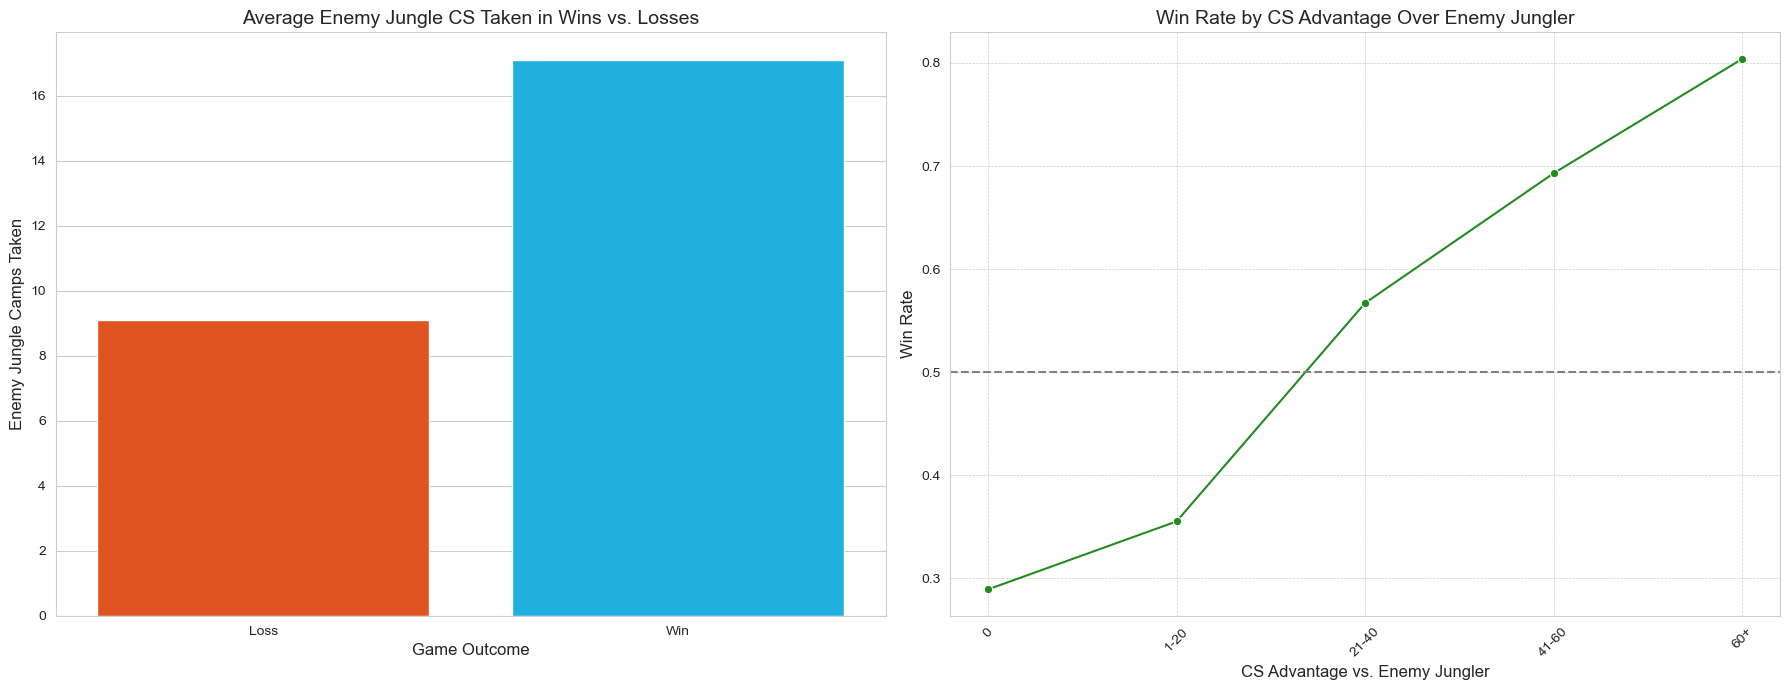

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Data Preparation ---
# Filter the DataFrame to only include the JUNGLE position.
jungle_df = cleaned_df[cleaned_df['teamPosition'] == 'JUNGLE'].copy()

# Calculate Jungle CS Per Minute from neutral minions killed.
jungle_df['jungleCsPerMinute'] = jungle_df.apply(
    lambda row: row['neutralMinionsKilled'] / (row['gameDuration'] / 60) if row['gameDuration'] > 0 else 0,
    axis=1
)

print("=== Creep Score (CS) Analysis for Junglers ===\n")


# --- 2. Overall Jungle CS Metrics for Wins vs. Losses ---
print("--- Average Jungle CS Metrics in Wins vs. Losses ---")

# Define the key CS metrics relevant to junglers.
# Note: For junglers, 'maxCsAdvantageOnLaneOpponent' compares them to the enemy jungler.
cs_metrics_jungle = ['jungleCsPerMinute', 'totalEnemyJungleMinionsKilled', 'jungleCsBefore10Minutes', 'maxCsAdvantageOnLaneOpponent']
cs_win_loss_jungle = jungle_df.groupby('win')[cs_metrics_jungle].mean().round(2)
cs_win_loss_jungle.index = ['Loss', 'Win']

print(cs_win_loss_jungle)
print("\n" + "="*70 + "\n")


# --- 3. Win Rate by CS Advantage Over Enemy Jungler ---
print("--- Win Rate by Max CS Advantage Over Enemy Jungler ---")

# Create bins for CS advantage to see how win rate scales with a farming lead over the enemy jungler.
bins_cs_jng = [-np.inf, -40, -20, -1, 0, 20, 40, 60, np.inf]
labels_cs_jng = ['-40+', '-39 to -20', '-19 to -1', '0', '1-20', '21-40', '41-60', '60+']
jungle_df['cs_adv_bins_jng'] = pd.cut(jungle_df['maxCsAdvantageOnLaneOpponent'], bins=bins_cs_jng, labels=labels_cs_jng, right=True)

win_rate_by_cs_adv_jng = jungle_df.groupby('cs_adv_bins_jng', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_cs_adv_jng.columns = ['Win_Rate', 'Games']
win_rate_by_cs_adv_jng = win_rate_by_cs_adv_jng[win_rate_by_cs_adv_jng['Games'] >= 50]

print(win_rate_by_cs_adv_jng)
print("\n" + "="*70 + "\n")


# --- 4. Visualizations ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.set_style("whitegrid")

# Plot 1: Comparing Enemy Jungle CS in Wins vs. Losses
sns.barplot(
    x=cs_win_loss_jungle.index,
    y=cs_win_loss_jungle['totalEnemyJungleMinionsKilled'],
    ax=axes[0],
    hue=cs_win_loss_jungle.index,
    palette=['orangered', 'deepskyblue'],
    legend=False
)
axes[0].set_title('Average Enemy Jungle CS Taken in Wins vs. Losses', fontsize=14)
axes[0].set_xlabel('Game Outcome', fontsize=12)
axes[0].set_ylabel('Enemy Jungle Camps Taken', fontsize=12)

# Plot 2: Win Rate by CS Advantage
sns.lineplot(x=win_rate_by_cs_adv_jng.index, y=win_rate_by_cs_adv_jng['Win_Rate'], ax=axes[1], marker='o', color='forestgreen')
axes[1].set_title('Win Rate by CS Advantage Over Enemy Jungler', fontsize=14)
axes[1].set_xlabel('CS Advantage vs. Enemy Jungler', fontsize=12)
axes[1].set_ylabel('Win Rate', fontsize=12)
axes[1].axhline(y=0.5, color='grey', linestyle='--')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


**Key Takeaways**
- Higher CS/M shows a higher win rate. The winning player with an early advantage can usually pressure the lane harder, denying farm from the opponent. 
- CS = Gold, and gold is one of the most important resources in the game.
- Jungers who take more enemy camps also has a high correlation to winning, however, typically the winning team will have more control over the map, which can indicate a bias towards winning team rather than winning jungler.

## Objectives

### Towers

=== Tower, First Tower Time, and Turret Plate Analysis ===

--- Win Rate by Securing First Tower ---
 Did Not Get First Tower Kill    0.478
Got First Tower Kill            0.710
Name: win, dtype: float64 

--- Win Rate by First Tower Kill Time ---
                        Win_Rate  Games
first_tower_time_bins                 
< 8 min                   0.667     24
8-10 min                  0.754    313
10-12 min                 0.752   2077
12-14 min                 0.743   4956
14-16 min                 0.678   6753
16+ min                   0.657    896 

--- Win Rate by Turret Plates Taken ---
             Win_Rate  Games
plate_bins                 
0              0.417  66393
1              0.485  33301
2              0.537  23937
3              0.602  14275
4              0.672   8278
5              0.715   6964
6+             0.806   2542 

--- Average Turret Plates Taken by Role ---
 teamPosition
TOP        1.91
BOTTOM     1.88
MIDDLE     1.35
UTILITY    1.22
JUNGLE     0.37
Name

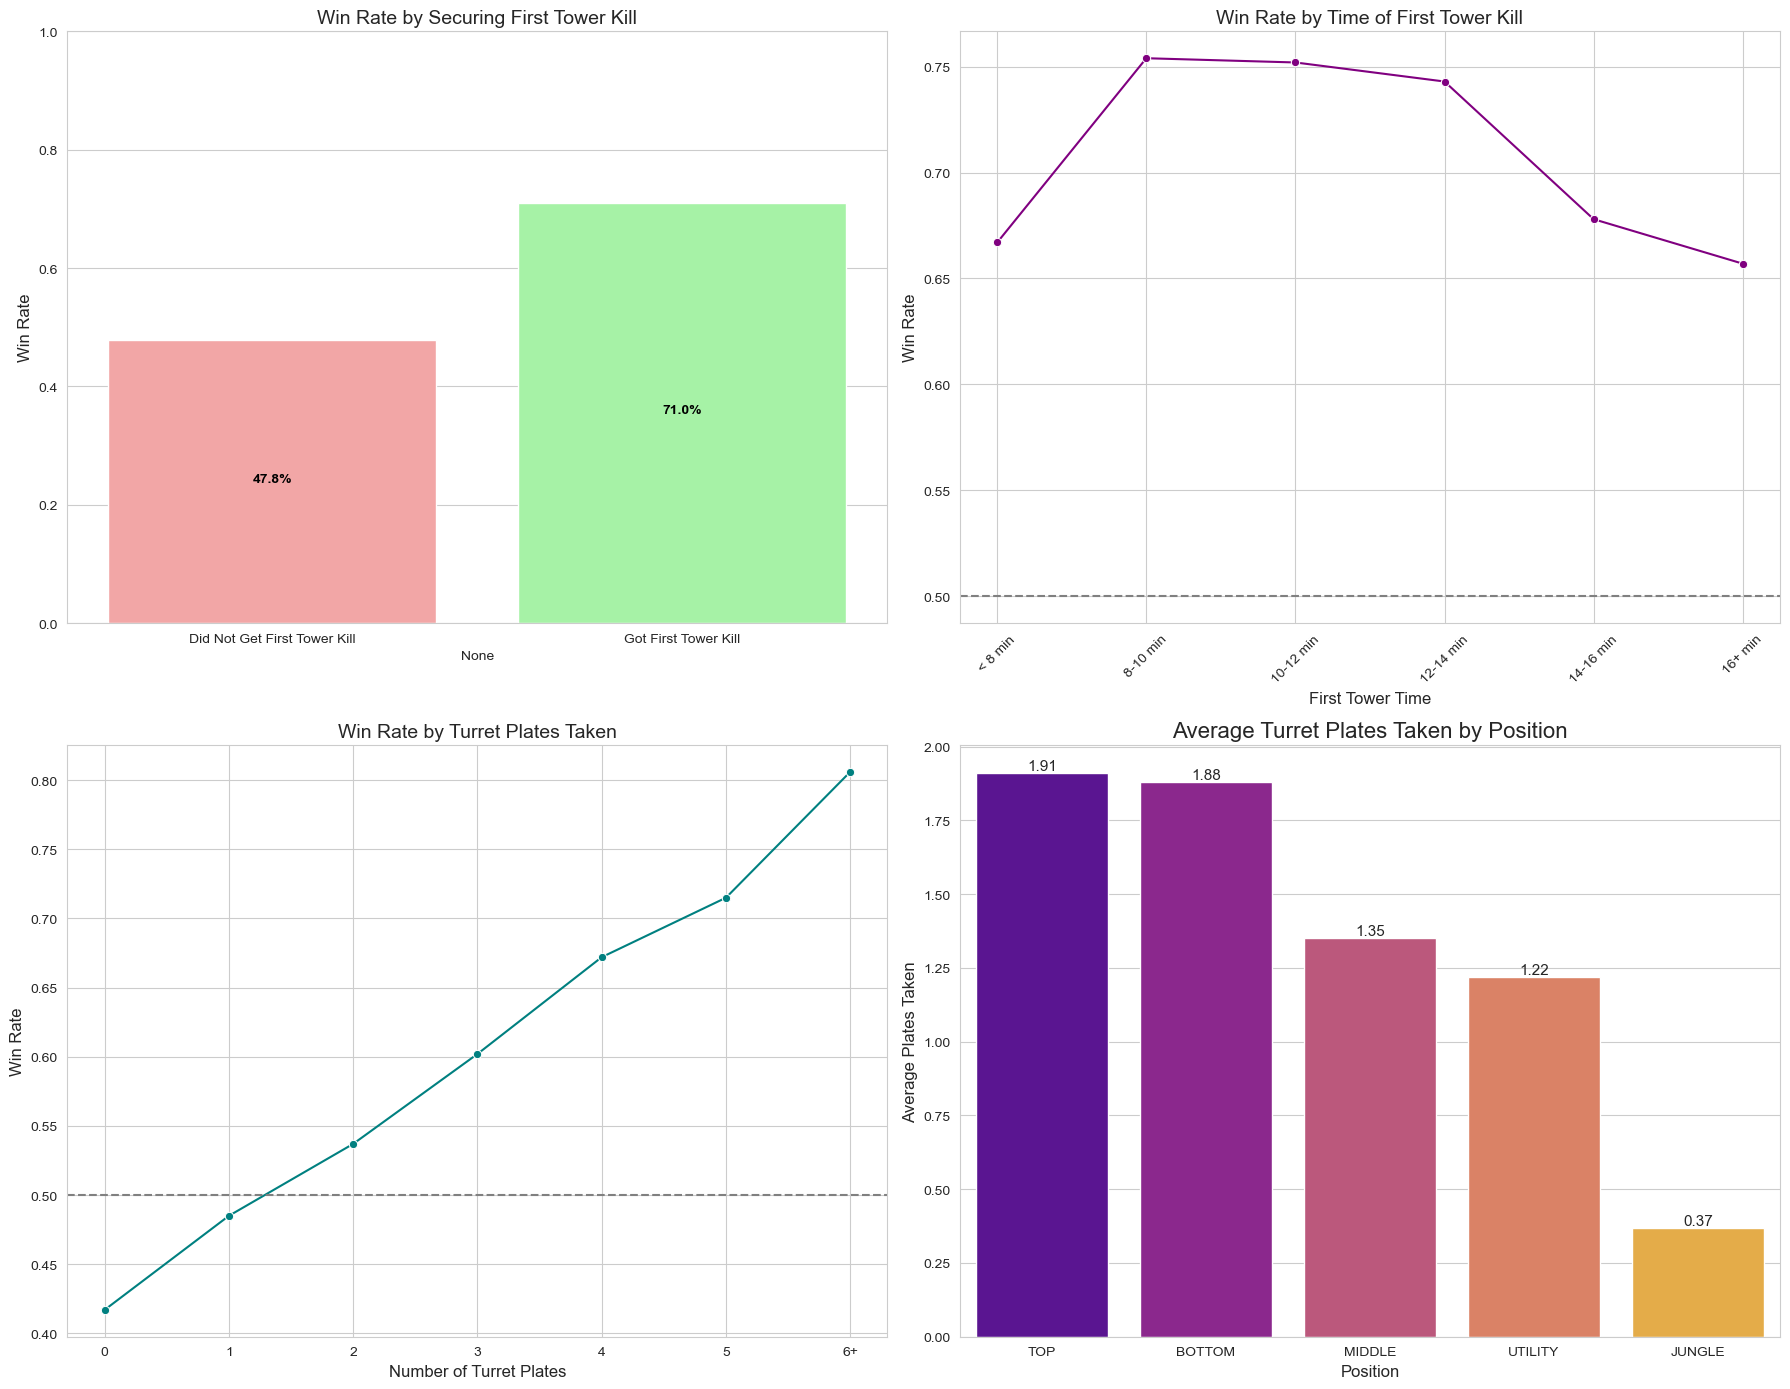

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Data Preparation ---
tower_df = cleaned_df.copy()
tower_df.dropna(subset=['firstTowerKill'], inplace=True)
tower_df['firstTowerKill'] = tower_df['firstTowerKill'].astype(bool)
tower_df['firstTurretKilledTime'] = tower_df['firstTurretKilledTime'].fillna(0)

print("=== Tower, First Tower Time, and Turret Plate Analysis ===\n")


# --- 2. Calculations for Plotting ---

# Win Rate by First Tower Kill
win_rate_ft = tower_df.groupby('firstTowerKill')['win'].mean().round(3)
win_rate_ft.index = ['Did Not Get First Tower Kill', 'Got First Tower Kill']
print("--- Win Rate by Securing First Tower ---\n", win_rate_ft, "\n" + "="*50 + "\n")

# Win Rate by First Tower Time
first_tower_takers = tower_df[tower_df['firstTowerKill'] == True].copy()
bins_time = [0, 480, 600, 720, 840, 960, np.inf]
labels_time = ['< 8 min', '8-10 min', '10-12 min', '12-14 min', '14-16 min', '16+ min']
first_tower_takers['first_tower_time_bins'] = pd.cut(first_tower_takers['firstTurretKilledTime'], bins=bins_time, labels=labels_time, right=False)
win_rate_by_time = first_tower_takers.groupby('first_tower_time_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_time.columns = ['Win_Rate', 'Games']
print("--- Win Rate by First Tower Kill Time ---\n", win_rate_by_time, "\n" + "="*50 + "\n")

# Win Rate by Turret Plates Taken
bins_plates = [-1, 0, 1, 2, 3, 4, 5, np.inf]
labels_plates = ['0', '1', '2', '3', '4', '5', '6+']
tower_df['plate_bins'] = pd.cut(tower_df['turretPlatesTaken'], bins=bins_plates, labels=labels_plates, right=True)
win_rate_by_plates = tower_df.groupby('plate_bins', observed=False)['win'].agg(['mean', 'count']).round(3)
win_rate_by_plates.columns = ['Win_Rate', 'Games']
print("--- Win Rate by Turret Plates Taken ---\n", win_rate_by_plates[win_rate_by_plates['Games'] >= 50], "\n" + "="*50 + "\n")

# Average Turret Plates by Position
plates_by_position = cleaned_df.groupby('teamPosition')['turretPlatesTaken'].mean().round(2).sort_values(ascending=False)
print("--- Average Turret Plates Taken by Role ---\n", plates_by_position, "\n" + "="*50 + "\n")


# --- 3. Visualizations (2x2 Grid) ---
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Changed to 2x2 layout
sns.set_style("whitegrid")

# Plot 1: Win Rate by First Tower (Top-Left)
ax1 = axes[0, 0]
sns.barplot(x=win_rate_ft.index, y=win_rate_ft.values, ax=ax1, hue=win_rate_ft.index, palette=['#ff9999','#99ff99'], legend=False)
ax1.set_title('Win Rate by Securing First Tower Kill', fontsize=14)
ax1.set_ylabel('Win Rate', fontsize=12)
ax1.set_ylim(0, 1)
for i, v in enumerate(win_rate_ft.values):
    ax1.text(i, v/2, f'{v:.1%}', color='black', ha='center', weight='bold')

# Plot 2: Win Rate by First Tower Time (Top-Right)
ax2 = axes[0, 1]
sns.lineplot(x=win_rate_by_time.index, y=win_rate_by_time['Win_Rate'], ax=ax2, marker='o', color='purple')
ax2.set_title('Win Rate by Time of First Tower Kill', fontsize=14)
ax2.set_xlabel('First Tower Time', fontsize=12)
ax2.set_ylabel('Win Rate', fontsize=12)
ax2.axhline(y=0.5, color='grey', linestyle='--')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Win Rate by Turret Plates Taken (Bottom-Left)
ax3 = axes[1, 0]
sns.lineplot(x=win_rate_by_plates.index, y=win_rate_by_plates['Win_Rate'], ax=ax3, marker='o', color='teal')
ax3.set_title('Win Rate by Turret Plates Taken', fontsize=14)
ax3.set_xlabel('Number of Turret Plates', fontsize=12)
ax3.set_ylabel('Win Rate', fontsize=12)
ax3.axhline(y=0.5, color='grey', linestyle='--')

# Plot 4: Average Turret Plates by Position (Bottom-Right)
ax4 = axes[1, 1]
sns.barplot(x=plates_by_position.index, y=plates_by_position.values, ax=ax4, hue=plates_by_position.index, palette='plasma', legend=False)
ax4.set_title('Average Turret Plates Taken by Position', fontsize=16)
ax4.set_xlabel('Position', fontsize=12)
ax4.set_ylabel('Average Plates Taken', fontsize=12)
for index, value in enumerate(plates_by_position.values):
    ax4.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=11)


plt.tight_layout()
plt.show()


**Key Takeaway**
- Teams that get first turret wins 71% of the time. The highest win rate by time of kill is 8-10 minutes, with a steep fall off at 12-14 minutes, which can be explained by turret plates dropping at the 14 minute mark. 
- Turret plates = gold, so it makes sense that it has a strong correlation to winning

### Neutral Objectives

## Vision

## Communication

# EDA (Non-Role Specific / Trivial)

1. Spell Casts 
    - What abilities gets pressed the most (Q)
    - How does summoner spell usage correlate with win/loss
2. Fist Bump Participation
    - Is there a correlation with players who likes to fist bump and win/loss